In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from PIL import Image
from torchvision import transforms
import torch
import torch.nn as nn
# import torch.nn.functional as F
# from torchvision.models.resnet import resnet34, resnet50, resnet101, resnet152
# from torchvision.models.densenet import densenet121, densenet161, densenet169, densenet201
# from torchvision.models.vgg import vgg19

In [6]:
sns.set_style('whitegrid')

In [3]:
renset101_output = '''
Time: 0:10:12   epoch: 1 [100/252]      BCEloss: 4.304e-01
Time: 0:20:17   epoch: 1 [200/252]      BCEloss: 3.988e-01
Time: 0:25:31   epoch: 1 [252/252]      BCEloss: 3.877e-01
ACC: 0.43820224719101125 out of total:1335
[0.93130436 0.82499883 0.90347136 0.94049604 0.84278633 0.81777553]
mean_auc: 0.876805
save model
Time: 0:37:11   epoch: 2 [100/252]      BCEloss: 3.364e-01
Time: 0:47:28   epoch: 2 [200/252]      BCEloss: 3.266e-01
Time: 0:52:49   epoch: 2 [252/252]      BCEloss: 3.247e-01
ACC: 0.4666666666666667 out of total:1335
[0.92493488 0.83061318 0.90526365 0.94238819 0.84756158 0.82743659]
mean_auc: 0.879700
save model
Time: 1:04:33   epoch: 3 [100/252]      BCEloss: 3.032e-01
Time: 1:14:49   epoch: 3 [200/252]      BCEloss: 3.007e-01
Time: 1:20:10   epoch: 3 [252/252]      BCEloss: 2.990e-01
ACC: 0.4397003745318352 out of total:1335
[0.94883819 0.89453583 0.92272018 0.95660312 0.86056958 0.85307602]
mean_auc: 0.906057
save model
Time: 1:32:00   epoch: 4 [100/252]      BCEloss: 2.850e-01
Time: 1:42:18   epoch: 4 [200/252]      BCEloss: 2.779e-01
Time: 1:47:39   epoch: 4 [252/252]      BCEloss: 2.769e-01
ACC: 0.5228464419475656 out of total:1335
[0.95697601 0.8833306  0.9262725  0.9575526  0.86834667 0.84079089]
mean_auc: 0.905545
Time: 1:59:25   epoch: 5 [100/252]      BCEloss: 2.499e-01
Time: 2:09:42   epoch: 5 [200/252]      BCEloss: 2.545e-01
Time: 2:15:03   epoch: 5 [252/252]      BCEloss: 2.555e-01
ACC: 0.5213483146067416 out of total:1335
[0.94760942 0.89620195 0.92222737 0.95963192 0.88355296 0.81923713]
mean_auc: 0.904743
Time: 2:26:48   epoch: 6 [100/252]      BCEloss: 2.289e-01
Time: 2:37:06   epoch: 6 [200/252]      BCEloss: 2.390e-01
Time: 2:42:28   epoch: 6 [252/252]      BCEloss: 2.416e-01
ACC: 0.5153558052434457 out of total:1335
[0.95258948 0.88784202 0.93405475 0.96200391 0.88467057 0.8687908 ]
mean_auc: 0.914992
save model
Time: 2:54:12   epoch: 7 [100/252]      BCEloss: 2.190e-01
Time: 3:04:29   epoch: 7 [200/252]      BCEloss: 2.227e-01
Time: 3:09:50   epoch: 7 [252/252]      BCEloss: 2.251e-01
ACC: 0.5423220973782772 out of total:1335
[0.94359815 0.87473014 0.9286104  0.96262668 0.8912931  0.85595775]
mean_auc: 0.909469
Time: 3:21:33   epoch: 8 [100/252]      BCEloss: 2.113e-01
Time: 3:31:50   epoch: 8 [200/252]      BCEloss: 2.104e-01
Time: 3:37:08   epoch: 8 [252/252]      BCEloss: 2.088e-01
ACC: 0.5453183520599251 out of total:1335
[0.95624758 0.90590534 0.92795039 0.9536594  0.89378387 0.85892538]
mean_auc: 0.916079
save model
Time: 3:48:52   epoch: 9 [100/252]      BCEloss: 1.874e-01
Time: 3:59:09   epoch: 9 [200/252]      BCEloss: 1.939e-01
Time: 4:04:30   epoch: 9 [252/252]      BCEloss: 1.973e-01
ACC: 0.5325842696629214 out of total:1335
[0.9537459  0.90855705 0.93338887 0.95901935 0.88377463 0.86552997]
mean_auc: 0.917336
save model
Time: 4:16:15   epoch: 10 [100/252]     BCEloss: 1.705e-01
Time: 4:26:31   epoch: 10 [200/252]     BCEloss: 1.728e-01
Time: 4:31:52   epoch: 10 [252/252]     BCEloss: 1.758e-01
ACC: 0.5692883895131086 out of total:1335
[0.95365515 0.89922913 0.92764532 0.96118715 0.88969828 0.86682719]
mean_auc: 0.916374
Time: 4:43:37   epoch: 11 [100/252]     BCEloss: 1.526e-01
Time: 4:53:54   epoch: 11 [200/252]     BCEloss: 1.610e-01
Time: 4:59:14   epoch: 11 [252/252]     BCEloss: 1.640e-01
ACC: 0.5220973782771535 out of total:1335
[0.94866651 0.88528418 0.92520768 0.95621516 0.89487685 0.87320077]
mean_auc: 0.913909
Time: 5:10:58   epoch: 12 [100/252]     BCEloss: 1.409e-01
Time: 5:21:15   epoch: 12 [200/252]     BCEloss: 1.472e-01
Time: 5:26:35   epoch: 12 [252/252]     BCEloss: 1.523e-01
ACC: 0.5363295880149813 out of total:1335
[0.95096952 0.89904139 0.92346232 0.95564343 0.8830665  0.86477177]
mean_auc: 0.912826
Time: 5:38:22   epoch: 13 [100/252]     BCEloss: 1.348e-01
Time: 5:48:39   epoch: 13 [200/252]     BCEloss: 1.376e-01
Time: 5:53:59   epoch: 13 [252/252]     BCEloss: 1.402e-01
ACC: 0.5438202247191011 out of total:1335
[0.95554367 0.89322758 0.92365299 0.95418348 0.88821736 0.88137802]
mean_auc: 0.916034
Time: 6:05:44   epoch: 14 [100/252]     BCEloss: 1.114e-01
Time: 6:16:01   epoch: 14 [200/252]     BCEloss: 1.170e-01
Time: 6:21:21   epoch: 14 [252/252]     BCEloss: 1.177e-01
ACC: 0.5588014981273408 out of total:1335
[0.95626597 0.90520721 0.92811173 0.96083323 0.8708867  0.87583076]
mean_auc: 0.916189
Time: 6:33:05   epoch: 15 [100/252]     BCEloss: 1.043e-01
Time: 6:43:21   epoch: 15 [200/252]     BCEloss: 1.103e-01
Time: 6:48:41   epoch: 15 [252/252]     BCEloss: 1.115e-01
ACC: 0.5692883895131086 out of total:1335
[0.95270844 0.91970949 0.9394727  0.94671699 0.88793719 0.8564257 ]
mean_auc: 0.917162
Time: 7:00:26   epoch: 16 [100/252]     BCEloss: 9.730e-02
Time: 7:10:43   epoch: 16 [200/252]     BCEloss: 1.000e-01
Time: 7:16:04   epoch: 16 [252/252]     BCEloss: 1.006e-01
ACC: 0.5273408239700375 out of total:1335
[0.9464248  0.91661191 0.93203659 0.95188296 0.84619458 0.84488692]
mean_auc: 0.906340
Time: 7:27:49   epoch: 17 [100/252]     BCEloss: 9.107e-02
Time: 7:38:06   epoch: 17 [200/252]     BCEloss: 9.330e-02
Time: 7:43:26   epoch: 17 [252/252]     BCEloss: 9.598e-02
ACC: 0.5565543071161049 out of total:1335
[0.95877869 0.92111747 0.93050243 0.95968637 0.88740456 0.85857293]
mean_auc: 0.919344
save model
Time: 7:55:10   epoch: 18 [100/252]     BCEloss: 7.941e-02
Time: 8:05:27   epoch: 18 [200/252]     BCEloss: 8.069e-02
Time: 8:10:47   epoch: 18 [252/252]     BCEloss: 8.274e-02
ACC: 0.5348314606741573 out of total:1335
[0.95232337 0.89765101 0.91262936 0.95111895 0.86340825 0.87544574]
mean_auc: 0.908763
Time: 8:22:30   epoch: 19 [100/252]     BCEloss: 7.457e-02
Time: 8:32:47   epoch: 19 [200/252]     BCEloss: 7.899e-02
Time: 8:38:08   epoch: 19 [252/252]     BCEloss: 8.194e-02
ACC: 0.547565543071161 out of total:1335
[0.95539161 0.91393673 0.93025016 0.9589615  0.8830665  0.85995012]
mean_auc: 0.916926
Time: 8:49:53   epoch: 20 [100/252]     BCEloss: 6.864e-02
Time: 9:00:08   epoch: 20 [200/252]     BCEloss: 6.865e-02
Time: 9:05:28   epoch: 20 [252/252]     BCEloss: 7.012e-02
ACC: 0.5385767790262173 out of total:1335
[0.95196039 0.92064228 0.93453582 0.96236464 0.87398707 0.85867956]
mean_auc: 0.917028
Time: 9:17:12   epoch: 21 [100/252]     BCEloss: 6.200e-02
Time: 9:27:27   epoch: 21 [200/252]     BCEloss: 6.403e-02
Time: 9:32:47   epoch: 21 [252/252]     BCEloss: 6.644e-02
ACC: 0.5535580524344569 out of total:1335
[0.95711949 0.91099756 0.92363099 0.94717982 0.89190887 0.87554051]
mean_auc: 0.917730
Time: 9:44:31   epoch: 22 [100/252]     BCEloss: 5.434e-02
Time: 9:54:46   epoch: 22 [200/252]     BCEloss: 5.988e-02
Time: 10:00:06  epoch: 22 [252/252]     BCEloss: 6.217e-02
ACC: 0.5842696629213483 out of total:1335
[0.95806988 0.92453184 0.93135604 0.96190522 0.87989532 0.86774236]
mean_auc: 0.920583
save model
Time: 10:11:48  epoch: 23 [100/252]     BCEloss: 6.300e-02
Time: 10:22:03  epoch: 23 [200/252]     BCEloss: 6.141e-02
Time: 10:27:22  epoch: 23 [252/252]     BCEloss: 6.253e-02
ACC: 0.5640449438202247 out of total:1335
[0.94727709 0.90295443 0.93042909 0.96704396 0.87890702 0.86377664]
mean_auc: 0.915065
Time: 10:39:05  epoch: 24 [100/252]     BCEloss: 5.641e-02
Time: 10:49:20  epoch: 24 [200/252]     BCEloss: 5.863e-02
Time: 10:54:40  epoch: 24 [252/252]     BCEloss: 5.913e-02
ACC: 0.5662921348314607 out of total:1335
[0.95429161 0.92376038 0.92834346 0.95910783 0.87374692 0.86331758]
mean_auc: 0.917095
Time: 11:06:26  epoch: 25 [100/252]     BCEloss: 5.292e-02
Time: 11:16:42  epoch: 25 [200/252]     BCEloss: 5.462e-02
Time: 11:22:02  epoch: 25 [252/252]     BCEloss: 5.648e-02
ACC: 0.5722846441947566 out of total:1335
[0.95645237 0.91625405 0.9261933  0.95556516 0.89237993 0.87324223]
mean_auc: 0.920015
Time: 11:33:46  epoch: 26 [100/252]     BCEloss: 4.772e-02
Time: 11:44:01  epoch: 26 [200/252]     BCEloss: 5.260e-02
Time: 11:49:21  epoch: 26 [252/252]     BCEloss: 5.145e-02
ACC: 0.5513108614232209 out of total:1335
[0.95572762 0.92164547 0.92302818 0.96034998 0.87799877 0.85508109]
mean_auc: 0.915639
Time: 12:01:01  epoch: 27 [100/252]     BCEloss: 4.889e-02
Time: 12:11:17  epoch: 27 [200/252]     BCEloss: 4.739e-02
Time: 12:16:37  epoch: 27 [252/252]     BCEloss: 4.833e-02
ACC: 0.5715355805243446 out of total:1335
[0.95668415 0.9184071  0.92146176 0.95526228 0.86936884 0.86484878]
mean_auc: 0.914339
Time: 12:28:21  epoch: 28 [100/252]     BCEloss: 4.156e-02
Time: 12:38:36  epoch: 28 [200/252]     BCEloss: 4.535e-02
Time: 12:43:57  epoch: 28 [252/252]     BCEloss: 4.999e-02
ACC: 0.549063670411985 out of total:1335
[0.95325169 0.91220022 0.91476486 0.95938689 0.89254772 0.8574386 ]
mean_auc: 0.914932
Time: 12:55:41  epoch: 29 [100/252]     BCEloss: 4.597e-02
Time: 13:05:58  epoch: 29 [200/252]     BCEloss: 4.773e-02
Time: 13:11:18  epoch: 29 [252/252]     BCEloss: 4.923e-02
ACC: 0.5872659176029963 out of total:1335
[0.95900065 0.9214812  0.93269659 0.95494409 0.8955234  0.87255216]
mean_auc: 0.922700
save model
Time: 13:23:01  epoch: 30 [100/252]     BCEloss: 4.034e-02
Time: 13:33:17  epoch: 30 [200/252]     BCEloss: 4.011e-02
Time: 13:38:37  epoch: 30 [252/252]     BCEloss: 3.981e-02
ACC: 0.5632958801498127 out of total:1335
[0.95276853 0.9378608  0.93224779 0.95617773 0.87673953 0.86154648]
mean_auc: 0.919557
ACC: 0.5872659176029963 out of total:1335
[0.95900065 0.9214812  0.93269659 0.95494409 0.8955234  0.87255216]
mean_auc: 0.922700'''

In [4]:
renset101_output = renset101_output.split('\n')

In [5]:
l = []
for a in renset101_output:
    if 'BCEloss' in a:
        l.append(a)

In [6]:
resnet_loss = []
for e in l:
    resnet_loss.append(float( e.split(' ')[-1] ))

In [45]:
print(resnet_loss)

[0.4304, 0.3988, 0.3877, 0.3364, 0.3266, 0.3247, 0.3032, 0.3007, 0.299, 0.285, 0.2779, 0.2769, 0.2499, 0.2545, 0.2555, 0.2289, 0.239, 0.2416, 0.219, 0.2227, 0.2251, 0.2113, 0.2104, 0.2088, 0.1874, 0.1939, 0.1973, 0.1705, 0.1728, 0.1758, 0.1526, 0.161, 0.164, 0.1409, 0.1472, 0.1523, 0.1348, 0.1376, 0.1402, 0.1114, 0.117, 0.1177, 0.1043, 0.1103, 0.1115, 0.0973, 0.1, 0.1006, 0.09107, 0.0933, 0.09598, 0.07941, 0.08069, 0.08274, 0.07457, 0.07899, 0.08194, 0.06864, 0.06865, 0.07012, 0.062, 0.06403, 0.06644, 0.05434, 0.05988, 0.06217, 0.063, 0.06141, 0.06253, 0.05641, 0.05863, 0.05913, 0.05292, 0.05462, 0.05648, 0.04772, 0.0526, 0.05145, 0.04889, 0.04739, 0.04833, 0.04156, 0.04535, 0.04999, 0.04597, 0.04773, 0.04923, 0.04034, 0.04011, 0.03981]


In [7]:
densenet201_output = '''
Time: 0:11:10	epoch: 1 [100/252]	BCEloss: 4.276e-01
Time: 0:21:58	epoch: 1 [200/252]	BCEloss: 3.870e-01
Time: 0:27:34	epoch: 1 [252/252]	BCEloss: 3.781e-01
ACC: 0.4352059925093633 out of total:1335
[0.93658732 0.8397123  0.90519912 0.94769369 0.85018473 0.81131014]
mean_auc: 0.881781
save model
Time: 0:40:08	epoch: 2 [100/252]	BCEloss: 3.098e-01
Time: 0:50:54	epoch: 2 [200/252]	BCEloss: 3.088e-01
Time: 0:56:34	epoch: 2 [252/252]	BCEloss: 3.071e-01
ACC: 0.49063670411985016 out of total:1335
[0.94576505 0.86520275 0.92300178 0.95348924 0.86849138 0.84712893]
mean_auc: 0.900513
save model
Time: 1:08:51	epoch: 3 [100/252]	BCEloss: 2.759e-01
Time: 1:19:43	epoch: 3 [200/252]	BCEloss: 2.774e-01
Time: 1:25:25	epoch: 3 [252/252]	BCEloss: 2.761e-01
ACC: 0.5146067415730337 out of total:1335
[0.95492561 0.87539306 0.92988055 0.96366464 0.88563116 0.86260677]
mean_auc: 0.912017
save model
Time: 1:37:54	epoch: 4 [100/252]	BCEloss: 2.346e-01
Time: 1:48:46	epoch: 4 [200/252]	BCEloss: 2.452e-01
Time: 1:54:27	epoch: 4 [252/252]	BCEloss: 2.477e-01
ACC: 0.5108614232209738 out of total:1335
[0.95527143 0.88367086 0.9327054  0.96299762 0.88055419 0.87472012]
mean_auc: 0.914987
save model
Time: 2:06:44	epoch: 5 [100/252]	BCEloss: 2.251e-01
Time: 2:17:36	epoch: 5 [200/252]	BCEloss: 2.231e-01
Time: 2:23:10	epoch: 5 [252/252]	BCEloss: 2.268e-01
ACC: 0.5363295880149813 out of total:1335
[0.96237669 0.89380251 0.93569451 0.96761909 0.88833744 0.85622135]
mean_auc: 0.917342
save model
Time: 2:35:34	epoch: 6 [100/252]	BCEloss: 1.919e-01
Time: 2:46:29	epoch: 6 [200/252]	BCEloss: 2.027e-01
Time: 2:52:11	epoch: 6 [252/252]	BCEloss: 2.054e-01
ACC: 0.5438202247191011 out of total:1335
[0.95515616 0.90270216 0.93432169 0.96452904 0.89067426 0.87251662]
mean_auc: 0.919983
save model
Time: 3:04:39	epoch: 7 [100/252]	BCEloss: 1.810e-01
Time: 3:15:24	epoch: 7 [200/252]	BCEloss: 1.848e-01
Time: 3:20:57	epoch: 7 [252/252]	BCEloss: 1.847e-01
ACC: 0.552059925093633 out of total:1335
[0.96339453 0.91442366 0.93041149 0.96218427 0.88912869 0.88122105]
mean_auc: 0.923461
save model
Time: 3:33:13	epoch: 8 [100/252]	BCEloss: 1.571e-01
Time: 3:44:00	epoch: 8 [200/252]	BCEloss: 1.616e-01
Time: 3:49:34	epoch: 8 [252/252]	BCEloss: 1.628e-01
ACC: 0.5138576779026217 out of total:1335
[0.95815327 0.88456845 0.92864267 0.95944815 0.88605911 0.87173769]
mean_auc: 0.914768
Time: 4:01:45	epoch: 9 [100/252]	BCEloss: 1.355e-01
Time: 4:12:34	epoch: 9 [200/252]	BCEloss: 1.403e-01
Time: 4:18:05	epoch: 9 [252/252]	BCEloss: 1.416e-01
ACC: 0.5453183520599251 out of total:1335
[0.95453319 0.89797954 0.92230951 0.9562594  0.87328202 0.86644809]
mean_auc: 0.911802
Time: 4:30:14	epoch: 10 [100/252]	BCEloss: 1.124e-01
Time: 4:41:02	epoch: 10 [200/252]	BCEloss: 1.225e-01
Time: 4:46:42	epoch: 10 [252/252]	BCEloss: 1.246e-01
ACC: 0.5602996254681648 out of total:1335
[0.95467544 0.90749519 0.93504916 0.95930862 0.88333436 0.87284833]
mean_auc: 0.918785
Time: 4:59:01	epoch: 11 [100/252]	BCEloss: 1.039e-01
Time: 5:09:54	epoch: 11 [200/252]	BCEloss: 1.111e-01
Time: 5:15:26	epoch: 11 [252/252]	BCEloss: 1.118e-01
ACC: 0.5310861423220974 out of total:1335
[0.95839976 0.89973952 0.92993042 0.95906699 0.88903633 0.87192428]
mean_auc: 0.918016
Time: 5:27:38	epoch: 12 [100/252]	BCEloss: 8.969e-02
Time: 5:38:27	epoch: 12 [200/252]	BCEloss: 9.506e-02
Time: 5:44:07	epoch: 12 [252/252]	BCEloss: 9.632e-02
ACC: 0.5617977528089888 out of total:1335
[0.95723844 0.92676116 0.9286632  0.95910443 0.89478756 0.88505645]
mean_auc: 0.925269
save model
Time: 5:56:22	epoch: 13 [100/252]	BCEloss: 7.074e-02
Time: 6:07:05	epoch: 13 [200/252]	BCEloss: 7.307e-02
Time: 6:12:41	epoch: 13 [252/252]	BCEloss: 7.592e-02
ACC: 0.5722846441947566 out of total:1335
[0.95184021 0.9096893  0.92521942 0.950195   0.88378387 0.87067444]
mean_auc: 0.915234
Time: 6:24:57	epoch: 14 [100/252]	BCEloss: 7.276e-02
Time: 6:35:42	epoch: 14 [200/252]	BCEloss: 7.297e-02
Time: 6:41:22	epoch: 14 [252/252]	BCEloss: 7.301e-02
ACC: 0.5835205992509364 out of total:1335
[0.95757445 0.91877083 0.92789759 0.96163637 0.87622229 0.87437952]
mean_auc: 0.919414
Time: 6:53:46	epoch: 15 [100/252]	BCEloss: 5.408e-02
Time: 7:04:35	epoch: 15 [200/252]	BCEloss: 5.768e-02
Time: 7:10:11	epoch: 15 [252/252]	BCEloss: 6.004e-02
ACC: 0.5453183520599251 out of total:1335
[0.95283107 0.91273994 0.92588529 0.9555039  0.85087131 0.87973724]
mean_auc: 0.912928
Time: 7:22:30	epoch: 16 [100/252]	BCEloss: 5.083e-02
Time: 7:33:17	epoch: 16 [200/252]	BCEloss: 5.712e-02
Time: 7:39:02	epoch: 16 [252/252]	BCEloss: 5.771e-02
ACC: 0.5625468164794007 out of total:1335
[0.9510897  0.91841296 0.92269965 0.95478244 0.88184113 0.8635012 ]
mean_auc: 0.915388
Time: 7:51:40	epoch: 17 [100/252]	BCEloss: 4.200e-02
Time: 8:02:47	epoch: 17 [200/252]	BCEloss: 4.584e-02
Time: 8:08:32	epoch: 17 [252/252]	BCEloss: 4.896e-02
ACC: 0.5580524344569289 out of total:1335
[0.95338659 0.93059206 0.92957548 0.96018323 0.87186268 0.87592849]
mean_auc: 0.920255
Time: 8:21:16	epoch: 18 [100/252]	BCEloss: 4.602e-02
Time: 8:32:27	epoch: 18 [200/252]	BCEloss: 4.823e-02
Time: 8:38:13	epoch: 18 [252/252]	BCEloss: 4.632e-02
ACC: 0.5737827715355805 out of total:1335
[0.96014112 0.9136962  0.93165818 0.96282066 0.89198892 0.88255381]
mean_auc: 0.923810
Time: 8:51:01	epoch: 19 [100/252]	BCEloss: 4.174e-02
Time: 9:02:19	epoch: 19 [200/252]	BCEloss: 4.287e-02
Time: 9:08:07	epoch: 19 [252/252]	BCEloss: 4.311e-02
ACC: 0.5655430711610487 out of total:1335
[0.95715873 0.9259105  0.93178138 0.95998584 0.88394397 0.8863981 ]
mean_auc: 0.924196
Time: 9:21:00	epoch: 20 [100/252]	BCEloss: 3.337e-02
Time: 9:32:10	epoch: 20 [200/252]	BCEloss: 3.920e-02
Time: 9:37:57	epoch: 20 [252/252]	BCEloss: 4.027e-02
ACC: 0.5850187265917604 out of total:1335
[0.95942496 0.92101187 0.92934081 0.95996542 0.88983374 0.87648085]
mean_auc: 0.922676
Time: 9:50:41	epoch: 21 [100/252]	BCEloss: 3.498e-02
Time: 10:02:03	epoch: 21 [200/252]	BCEloss: 3.758e-02
Time: 10:07:55	epoch: 21 [252/252]	BCEloss: 3.810e-02
ACC: 0.5850187265917604 out of total:1335
[0.95992039 0.93164218 0.93833161 0.96107485 0.89710283 0.87167845]
mean_auc: 0.926625
save model
Time: 10:20:38	epoch: 22 [100/252]	BCEloss: 2.788e-02
Time: 10:31:50	epoch: 22 [200/252]	BCEloss: 3.042e-02
Time: 10:37:36	epoch: 22 [252/252]	BCEloss: 3.198e-02
ACC: 0.5752808988764045 out of total:1335
[0.96167156 0.93235791 0.92808826 0.95920482 0.89568658 0.86355747]
mean_auc: 0.923428
Time: 10:50:34	epoch: 23 [100/252]	BCEloss: 2.832e-02
Time: 11:01:54	epoch: 23 [200/252]	BCEloss: 3.261e-02
Time: 11:07:47	epoch: 23 [252/252]	BCEloss: 3.232e-02
ACC: 0.5513108614232209 out of total:1335
[0.95695271 0.92089454 0.93342114 0.95338375 0.88874076 0.86719148]
mean_auc: 0.920097
Time: 11:20:39	epoch: 24 [100/252]	BCEloss: 3.251e-02
Time: 11:32:02	epoch: 24 [200/252]	BCEloss: 3.295e-02
Time: 11:37:56	epoch: 24 [252/252]	BCEloss: 3.387e-02
ACC: 0.5782771535580524 out of total:1335
[0.95888415 0.91181889 0.93559184 0.96173166 0.8847814  0.88122697]
mean_auc: 0.922339
Time: 11:50:57	epoch: 25 [100/252]	BCEloss: 2.676e-02
Time: 12:02:18	epoch: 25 [200/252]	BCEloss: 2.948e-02
Time: 12:08:09	epoch: 25 [252/252]	BCEloss: 3.139e-02
ACC: 0.5782771535580524 out of total:1335
[0.96174024 0.9220268  0.92976468 0.95616071 0.89540948 0.87060336]
mean_auc: 0.922618
Time: 12:21:04	epoch: 26 [100/252]	BCEloss: 2.817e-02
Time: 12:32:24	epoch: 26 [200/252]	BCEloss: 2.804e-02
Time: 12:38:15	epoch: 26 [252/252]	BCEloss: 2.808e-02
ACC: 0.5925093632958801 out of total:1335
[0.95441669 0.91140822 0.93026189 0.9601526  0.89263855 0.87614174]
mean_auc: 0.920837
Time: 12:51:04	epoch: 27 [100/252]	BCEloss: 3.113e-02
Time: 13:02:23	epoch: 27 [200/252]	BCEloss: 3.011e-02
Time: 13:08:16	epoch: 27 [252/252]	BCEloss: 2.808e-02
ACC: 0.5790262172284644 out of total:1335
[0.9610069  0.91792017 0.92904161 0.95518401 0.88901632 0.88300399]
mean_auc: 0.922529
Time: 13:21:26	epoch: 28 [100/252]	BCEloss: 2.579e-02
Time: 13:32:48	epoch: 28 [200/252]	BCEloss: 2.538e-02
Time: 13:38:45	epoch: 28 [252/252]	BCEloss: 2.602e-02
ACC: 0.5715355805243446 out of total:1335
[0.95834703 0.93753813 0.93076057 0.96507014 0.88266933 0.86548258]
mean_auc: 0.923311
Time: 13:51:29	epoch: 29 [100/252]	BCEloss: 2.436e-02
Time: 14:02:48	epoch: 29 [200/252]	BCEloss: 3.130e-02
Time: 14:08:47	epoch: 29 [252/252]	BCEloss: 3.344e-02
ACC: 0.5498127340823971 out of total:1335
[0.95273664 0.92681396 0.92739745 0.9601526  0.88010776 0.87901606]
mean_auc: 0.921037
Time: 14:21:31	epoch: 30 [100/252]	BCEloss: 2.522e-02
Time: 14:32:41	epoch: 30 [200/252]	BCEloss: 2.576e-02
Time: 14:38:30	epoch: 30 [252/252]	BCEloss: 2.593e-02
ACC: 0.5692883895131086 out of total:1335
[0.96141526 0.92644436 0.93321287 0.967517   0.88025862 0.86947495]
mean_auc: 0.923054
ACC: 0.5850187265917604 out of total:1335
[0.95992039 0.93164218 0.93833161 0.96107485 0.89710283 0.87167845]
mean_auc: 0.926625
'''

In [8]:
l = []
for a in densenet201_output.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

densenet_loss = []
for e in l:
    densenet_loss.append(float( e.split(' ')[-1] ))

In [9]:
len(densenet_loss)

90

In [11]:
vgg19_output = '''
Time: 0:19:58   epoch: 1 [100/252]      BCEloss: 4.723e-01
Time: 0:39:49   epoch: 1 [200/252]      BCEloss: 4.384e-01
Time: 0:50:10   epoch: 1 [252/252]      BCEloss: 4.295e-01
ACC: 0.3775280898876405 out of total:1335
[0.91994379 0.76498334 0.89242133 0.91871933 0.79617303 0.7700122 ]
mean_auc: 0.843709
save model
Time: 1:13:15   epoch: 2 [100/252]      BCEloss: 3.777e-01
Time: 1:33:20   epoch: 2 [200/252]      BCEloss: 3.727e-01
Time: 1:43:45   epoch: 2 [252/252]      BCEloss: 3.685e-01
ACC: 0.31760299625468164 out of total:1335
[0.91457253 0.81663303 0.90235668 0.93050782 0.83255542 0.8044153 ]
mean_auc: 0.866840
save model
Time: 2:06:54   epoch: 3 [100/252]      BCEloss: 3.361e-01
Time: 2:27:02   epoch: 3 [200/252]      BCEloss: 3.301e-01
Time: 2:37:35   epoch: 3 [252/252]      BCEloss: 3.327e-01
ACC: 0.4599250936329588 out of total:1335
[0.93580983 0.84336134 0.91673902 0.95299919 0.83361761 0.81669747]
mean_auc: 0.883204
save model
Time: 3:00:54   epoch: 4 [100/252]      BCEloss: 3.166e-01
Time: 3:21:10   epoch: 4 [200/252]      BCEloss: 3.106e-01
Time: 3:31:44   epoch: 4 [252/252]      BCEloss: 3.092e-01
ACC: 0.4794007490636704 out of total:1335
[0.94745981 0.851205   0.92094842 0.95930862 0.86545874 0.84727998]
mean_auc: 0.898610
save model
Time: 3:55:09   epoch: 5 [100/252]      BCEloss: 2.870e-01
Time: 4:15:27   epoch: 5 [200/252]      BCEloss: 2.886e-01
Time: 4:26:02   epoch: 5 [252/252]      BCEloss: 2.866e-01
ACC: 0.5131086142322098 out of total:1335
[0.95418001 0.86501502 0.90799463 0.94527065 0.87231527 0.86861902]
mean_auc: 0.902232
save model
Time: 4:49:24   epoch: 6 [100/252]      BCEloss: 2.676e-01
Time: 5:09:49   epoch: 6 [200/252]      BCEloss: 2.684e-01
Time: 5:20:26   epoch: 6 [252/252]      BCEloss: 2.699e-01
ACC: 0.46292134831460674 out of total:1335
[0.94408745 0.87451894 0.92656584 0.9561539  0.8678633  0.8500077 ]
mean_auc: 0.903200
save model
Time: 5:43:53   epoch: 7 [100/252]      BCEloss: 2.528e-01
Time: 6:04:12   epoch: 7 [200/252]      BCEloss: 2.564e-01
Time: 6:14:47   epoch: 7 [252/252]      BCEloss: 2.569e-01
ACC: 0.5288389513108614 out of total:1335
[0.95899207 0.90079551 0.92682104 0.96023087 0.88105603 0.87199832]
mean_auc: 0.916649
save model
Time: 6:38:19   epoch: 8 [100/252]      BCEloss: 2.468e-01
Time: 6:58:46   epoch: 8 [200/252]      BCEloss: 2.448e-01
Time: 7:09:22   epoch: 8 [252/252]      BCEloss: 2.445e-01
ACC: 0.5468164794007491 out of total:1335
[0.95633097 0.89544516 0.93007709 0.9544183  0.86626847 0.86690419]
mean_auc: 0.911574
Time: 7:32:36   epoch: 9 [100/252]      BCEloss: 2.239e-01
Time: 7:52:59   epoch: 9 [200/252]      BCEloss: 2.273e-01
Time: 8:03:37   epoch: 9 [252/252]      BCEloss: 2.306e-01
ACC: 0.4861423220973783 out of total:1335
[0.94435969 0.90164617 0.92310152 0.95645338 0.87322968 0.85789174]
mean_auc: 0.909447
Time: 8:27:03   epoch: 10 [100/252]     BCEloss: 2.067e-01
Time: 8:47:26   epoch: 10 [200/252]     BCEloss: 2.143e-01
Time: 8:58:01   epoch: 10 [252/252]     BCEloss: 2.149e-01
ACC: 0.550561797752809 out of total:1335
[0.95576686 0.89529849 0.92779492 0.956906   0.88866071 0.87450984]
mean_auc: 0.916489
Time: 9:21:24   epoch: 11 [100/252]     BCEloss: 1.988e-01
Time: 9:41:41   epoch: 11 [200/252]     BCEloss: 2.019e-01
Time: 9:52:14   epoch: 11 [252/252]     BCEloss: 2.011e-01
ACC: 0.5310861423220974 out of total:1335
[0.95522483 0.8979854  0.92229191 0.96155469 0.88998461 0.87039012]
mean_auc: 0.916239
Time: 10:15:36  epoch: 12 [100/252]     BCEloss: 1.887e-01
Time: 10:35:57  epoch: 12 [200/252]     BCEloss: 1.869e-01
Time: 10:46:32  epoch: 12 [252/252]     BCEloss: 1.907e-01
ACC: 0.5250936329588015 out of total:1335
[0.95473185 0.89634862 0.91757504 0.96636674 0.86028325 0.87486228]
mean_auc: 0.911695
Time: 11:10:05  epoch: 13 [100/252]     BCEloss: 1.767e-01
Time: 11:30:30  epoch: 13 [200/252]     BCEloss: 1.783e-01
Time: 11:41:06  epoch: 13 [252/252]     BCEloss: 1.810e-01
ACC: 0.5595505617977528 out of total:1335
[0.9590681  0.90574694 0.92879227 0.9589649  0.8854649  0.88152018]
mean_auc: 0.919926
save model
Time: 12:04:36  epoch: 14 [100/252]     BCEloss: 1.712e-01
Time: 12:25:00  epoch: 14 [200/252]     BCEloss: 1.691e-01
Time: 12:35:37  epoch: 14 [252/252]     BCEloss: 1.695e-01
ACC: 0.5430711610486891 out of total:1335
[0.95588704 0.89722861 0.93243846 0.9623204  0.87819889 0.87672519]
mean_auc: 0.917133
Time: 12:59:00  epoch: 15 [100/252]     BCEloss: 1.538e-01
Time: 13:19:21  epoch: 15 [200/252]     BCEloss: 1.553e-01
Time: 13:29:54  epoch: 15 [252/252]     BCEloss: 1.554e-01
ACC: 0.549063670411985 out of total:1335
[0.95366251 0.90562374 0.92819093 0.95649081 0.8763085  0.86968819]
mean_auc: 0.914994
Time: 13:53:08  epoch: 16 [100/252]     BCEloss: 1.457e-01
Time: 14:13:33  epoch: 16 [200/252]     BCEloss: 1.469e-01
Time: 14:24:09  epoch: 16 [252/252]     BCEloss: 1.465e-01
ACC: 0.5617977528089888 out of total:1335
[0.95016874 0.90847491 0.92256764 0.96248035 0.86987993 0.86975927]
mean_auc: 0.913888
Time: 14:47:34  epoch: 17 [100/252]     BCEloss: 1.355e-01
Time: 15:08:15  epoch: 17 [200/252]     BCEloss: 1.434e-01
Time: 15:18:50  epoch: 17 [252/252]     BCEloss: 1.453e-01
ACC: 0.5588014981273408 out of total:1335
[0.94871556 0.8947001  0.9305963  0.95997904 0.86980296 0.86950753]
mean_auc: 0.912217
Time: 15:42:09  epoch: 18 [100/252]     BCEloss: 1.307e-01
Time: 16:02:29  epoch: 18 [200/252]     BCEloss: 1.312e-01
Time: 16:13:02  epoch: 18 [252/252]     BCEloss: 1.330e-01
ACC: 0.5610486891385768 out of total:1335
[0.95439339 0.90853945 0.93241499 0.96269474 0.87944889 0.87693843]
mean_auc: 0.919072
Time: 16:36:22  epoch: 19 [100/252]     BCEloss: 1.099e-01
Time: 16:56:40  epoch: 19 [200/252]     BCEloss: 1.168e-01
Time: 17:07:12  epoch: 19 [252/252]     BCEloss: 1.199e-01
ACC: 0.5692883895131086 out of total:1335
[0.95583063 0.90807598 0.92717305 0.95426856 0.88277709 0.88905178]
mean_auc: 0.919530
Time: 17:30:33  epoch: 20 [100/252]     BCEloss: 1.052e-01
Time: 17:50:52  epoch: 20 [200/252]     BCEloss: 1.080e-01
Time: 18:01:32  epoch: 20 [252/252]     BCEloss: 1.108e-01
ACC: 0.549063670411985 out of total:1335
[0.95715996 0.89661262 0.92982482 0.96116673 0.88984606 0.88974482]
mean_auc: 0.920726
save model
Time: 18:24:58  epoch: 21 [100/252]     BCEloss: 1.003e-01
Time: 18:45:34  epoch: 21 [200/252]     BCEloss: 1.037e-01
Time: 18:56:06  epoch: 21 [252/252]     BCEloss: 1.062e-01
ACC: 0.549063670411985 out of total:1335
[0.95269495 0.9136786  0.90978692 0.94972537 0.8605234  0.87947069]
mean_auc: 0.910980
Time: 19:19:27  epoch: 22 [100/252]     BCEloss: 1.011e-01
Time: 19:40:44  epoch: 22 [200/252]     BCEloss: 9.865e-02
Time: 19:51:19  epoch: 22 [252/252]     BCEloss: 9.955e-02
ACC: 0.5797752808988764 out of total:1335
[0.95527511 0.92304759 0.92822026 0.96027511 0.88089594 0.87586334]
mean_auc: 0.920596
Time: 20:15:10  epoch: 23 [100/252]     BCEloss: 8.688e-02
Time: 20:37:02  epoch: 23 [200/252]     BCEloss: 8.842e-02
Time: 20:48:10  epoch: 23 [252/252]     BCEloss: 8.889e-02
ACC: 0.5595505617977528 out of total:1335
[0.95689507 0.90866265 0.9243306  0.95922354 0.88119458 0.89043786]
mean_auc: 0.920124
Time: 21:11:30  epoch: 24 [100/252]     BCEloss: 8.295e-02
Time: 21:32:25  epoch: 24 [200/252]     BCEloss: 8.200e-02
Time: 21:42:58  epoch: 24 [252/252]     BCEloss: 8.489e-02
ACC: 0.5445692883895131 out of total:1335
[0.95532171 0.91243488 0.93005362 0.95778741 0.88652709 0.88716222]
mean_auc: 0.921548
save model
Time: 22:06:17  epoch: 25 [100/252]     BCEloss: 6.939e-02
Time: 22:27:12  epoch: 25 [200/252]     BCEloss: 7.404e-02
Time: 22:37:44  epoch: 25 [252/252]     BCEloss: 7.537e-02
ACC: 0.5550561797752809 out of total:1335
[0.95039561 0.90507228 0.9306843  0.95919802 0.87889163 0.87474974]
mean_auc: 0.916499
Time: 23:02:26  epoch: 26 [100/252]     BCEloss: 6.999e-02
Time: 23:24:49  epoch: 26 [200/252]     BCEloss: 7.308e-02
Time: 23:36:01  epoch: 26 [252/252]     BCEloss: 7.685e-02
ACC: 0.5730337078651685 out of total:1335
[0.95444244 0.9181959  0.92422794 0.95995181 0.87555727 0.87951215]
mean_auc: 0.918648
Time: 23:59:19  epoch: 27 [100/252]     BCEloss: 6.584e-02
Time: 1 day, 0:19:36    epoch: 27 [200/252]     BCEloss: 6.835e-02
Time: 1 day, 0:30:08    epoch: 27 [252/252]     BCEloss: 6.924e-02
ACC: 0.5535580524344569 out of total:1335
[0.95288748 0.91530366 0.93148511 0.9541988  0.88407943 0.8758041 ]
mean_auc: 0.918960
Time: 1 day, 0:54:24    epoch: 28 [100/252]     BCEloss: 6.658e-02
Time: 1 day, 1:14:46    epoch: 28 [200/252]     BCEloss: 6.804e-02
Time: 1 day, 1:25:21    epoch: 28 [252/252]     BCEloss: 6.524e-02
ACC: 0.5707865168539326 out of total:1335
[0.95195425 0.90092458 0.92086628 0.95817197 0.86601755 0.88342159]
mean_auc: 0.913559
Time: 1 day, 1:48:42    epoch: 29 [100/252]     BCEloss: 5.237e-02
Time: 1 day, 2:09:00    epoch: 29 [200/252]     BCEloss: 5.829e-02
Time: 1 day, 2:19:32    epoch: 29 [252/252]     BCEloss: 5.776e-02
ACC: 0.5640449438202247 out of total:1335
[0.95633342 0.90042005 0.92558609 0.95303322 0.87285099 0.86861013]
mean_auc: 0.912806
Time: 1 day, 2:42:51    epoch: 30 [100/252]     BCEloss: 6.880e-02
Time: 1 day, 3:03:22    epoch: 30 [200/252]     BCEloss: 6.600e-02
Time: 1 day, 3:13:53    epoch: 30 [252/252]     BCEloss: 6.567e-02
ACC: 0.5700374531835206 out of total:1335
[0.95598269 0.88907401 0.92724638 0.9634077  0.8709806  0.87738269]
mean_auc: 0.914012
ACC: 0.5445692883895131 out of total:1335
[0.95532171 0.91243488 0.93005362 0.95778741 0.88652709 0.88716222]
mean_auc: 0.921548
'''

In [12]:
dn_np_out = '''Time: 0:12:18	epoch: 1 [100/252]	BCEloss: 4.917e-01
Time: 0:24:00	epoch: 1 [200/252]	BCEloss: 4.674e-01
Time: 0:30:10	epoch: 1 [252/252]	BCEloss: 4.600e-01
ACC: 0.29288389513108615 out of total:1335
[0.88818226 0.75613648 0.80659365 0.86992847 0.70731219 0.73540475]
mean_auc: 0.793926
save model
Time: 0:43:25	epoch: 2 [100/252]	BCEloss: 4.198e-01
Time: 0:55:20	epoch: 2 [200/252]	BCEloss: 4.201e-01
Time: 1:01:32	epoch: 2 [252/252]	BCEloss: 4.169e-01
ACC: 0.31161048689138576 out of total:1335
[0.89529488 0.78527597 0.81432309 0.89224288 0.73831281 0.73185663]
mean_auc: 0.809551
save model
Time: 1:14:51	epoch: 3 [100/252]	BCEloss: 4.008e-01
Time: 1:26:39	epoch: 3 [200/252]	BCEloss: 3.984e-01
Time: 1:32:52	epoch: 3 [252/252]	BCEloss: 3.949e-01
ACC: 0.35655430711610486 out of total:1335
[0.91733419 0.79595907 0.85529944 0.90839419 0.7702617  0.77977989]
mean_auc: 0.837838
save model
Time: 1:46:21	epoch: 4 [100/252]	BCEloss: 3.682e-01
Time: 1:58:11	epoch: 4 [200/252]	BCEloss: 3.732e-01
Time: 2:04:20	epoch: 4 [252/252]	BCEloss: 3.743e-01
ACC: 0.36779026217228467 out of total:1335
[0.91936987 0.84472239 0.8637417  0.91681017 0.77438732 0.79994017]
mean_auc: 0.853162
save model
Time: 2:17:51	epoch: 5 [100/252]	BCEloss: 3.657e-01
Time: 2:29:42	epoch: 5 [200/252]	BCEloss: 3.608e-01
Time: 2:35:55	epoch: 5 [252/252]	BCEloss: 3.614e-01
ACC: 0.38352059925093634 out of total:1335
[0.92449341 0.84095602 0.8663524  0.92537588 0.80015702 0.79863406]
mean_auc: 0.859328
save model
Time: 2:49:30	epoch: 6 [100/252]	BCEloss: 3.369e-01
Time: 3:01:20	epoch: 6 [200/252]	BCEloss: 3.485e-01
Time: 3:07:35	epoch: 6 [252/252]	BCEloss: 3.506e-01
ACC: 0.3700374531835206 out of total:1335
[0.92700245 0.81757462 0.88617323 0.93002117 0.76970443 0.77409639]
mean_auc: 0.850762
Time: 3:20:55	epoch: 7 [100/252]	BCEloss: 3.409e-01
Time: 3:32:37	epoch: 7 [200/252]	BCEloss: 3.442e-01
Time: 3:38:42	epoch: 7 [252/252]	BCEloss: 3.417e-01
ACC: 0.36404494382022473 out of total:1335
[0.92649721 0.84915169 0.88634337 0.93302955 0.80993842 0.81251259]
mean_auc: 0.869579
save model
Time: 3:52:00	epoch: 8 [100/252]	BCEloss: 3.319e-01
Time: 4:03:58	epoch: 8 [200/252]	BCEloss: 3.316e-01
Time: 4:10:09	epoch: 8 [252/252]	BCEloss: 3.306e-01
ACC: 0.32808988764044944 out of total:1335
[0.92424815 0.79934998 0.87885739 0.92728504 0.80986145 0.80139141]
mean_auc: 0.856832
Time: 4:23:30	epoch: 9 [100/252]	BCEloss: 3.215e-01
Time: 4:35:16	epoch: 9 [200/252]	BCEloss: 3.240e-01
Time: 4:41:27	epoch: 9 [252/252]	BCEloss: 3.250e-01
ACC: 0.4434456928838951 out of total:1335
[0.9281282  0.85406205 0.888561   0.93884552 0.81384852 0.81235562]
mean_auc: 0.872633
save model
Time: 4:54:57	epoch: 10 [100/252]	BCEloss: 3.174e-01
Time: 5:06:36	epoch: 10 [200/252]	BCEloss: 3.168e-01
Time: 5:12:47	epoch: 10 [252/252]	BCEloss: 3.167e-01
ACC: 0.42921348314606744 out of total:1335
[0.9337251  0.85880227 0.89373841 0.93800494 0.8309883  0.81109689]
mean_auc: 0.877726
save model
Time: 5:26:06	epoch: 11 [100/252]	BCEloss: 3.058e-01
Time: 5:38:08	epoch: 11 [200/252]	BCEloss: 3.121e-01
Time: 5:44:19	epoch: 11 [252/252]	BCEloss: 3.115e-01
ACC: 0.4202247191011236 out of total:1335
[0.93380358 0.87609119 0.88784819 0.94257536 0.82378695 0.82175901]
mean_auc: 0.880977
save model
Time: 5:57:33	epoch: 12 [100/252]	BCEloss: 2.989e-01
Time: 6:09:22	epoch: 12 [200/252]	BCEloss: 3.031e-01
Time: 6:15:32	epoch: 12 [252/252]	BCEloss: 3.038e-01
ACC: 0.45243445692883894 out of total:1335
[0.93162933 0.8592012  0.89636965 0.94539997 0.83563732 0.83220789]
mean_auc: 0.883408
save model
Time: 6:28:45	epoch: 13 [100/252]	BCEloss: 2.913e-01
Time: 6:40:34	epoch: 13 [200/252]	BCEloss: 2.949e-01
Time: 6:46:43	epoch: 13 [252/252]	BCEloss: 2.944e-01
ACC: 0.49063670411985016 out of total:1335
[0.93943482 0.85211433 0.90526365 0.95006908 0.84061576 0.83220196]
mean_auc: 0.886617
save model
Time: 7:00:01	epoch: 14 [100/252]	BCEloss: 2.886e-01
Time: 7:11:49	epoch: 14 [200/252]	BCEloss: 2.889e-01
Time: 7:17:45	epoch: 14 [252/252]	BCEloss: 2.872e-01
ACC: 0.46142322097378274 out of total:1335
[0.94242702 0.85656122 0.90549832 0.94146934 0.82116071 0.83065596]
mean_auc: 0.882962
Time: 7:31:01	epoch: 15 [100/252]	BCEloss: 2.789e-01
Time: 7:42:47	epoch: 15 [200/252]	BCEloss: 2.826e-01
Time: 7:49:00	epoch: 15 [252/252]	BCEloss: 2.840e-01
ACC: 0.49812734082397003 out of total:1335
[0.94267474 0.85681936 0.90806209 0.9409929  0.83971675 0.83504816]
mean_auc: 0.887219
save model
Time: 8:02:27	epoch: 16 [100/252]	BCEloss: 2.722e-01
Time: 8:14:13	epoch: 16 [200/252]	BCEloss: 2.778e-01
Time: 8:20:23	epoch: 16 [252/252]	BCEloss: 2.795e-01
ACC: 0.448689138576779 out of total:1335
[0.94229949 0.86150678 0.91110401 0.94280337 0.82290025 0.82263271]
mean_auc: 0.883874
Time: 8:33:41	epoch: 17 [100/252]	BCEloss: 2.661e-01
Time: 8:45:23	epoch: 17 [200/252]	BCEloss: 2.683e-01
Time: 8:51:26	epoch: 17 [252/252]	BCEloss: 2.702e-01
ACC: 0.45692883895131087 out of total:1335
[0.93432967 0.86788966 0.90732288 0.95066123 0.85287254 0.83283873]
mean_auc: 0.890986
save model
Time: 9:04:19	epoch: 18 [100/252]	BCEloss: 2.585e-01
Time: 9:15:27	epoch: 18 [200/252]	BCEloss: 2.630e-01
Time: 9:21:21	epoch: 18 [252/252]	BCEloss: 2.642e-01
ACC: 0.4868913857677903 out of total:1335
[0.94597843 0.87908903 0.90717915 0.94677144 0.85209206 0.84487211]
mean_auc: 0.895997
save model
Time: 9:34:00	epoch: 19 [100/252]	BCEloss: 2.570e-01
Time: 9:45:22	epoch: 19 [200/252]	BCEloss: 2.595e-01
Time: 9:51:11	epoch: 19 [252/252]	BCEloss: 2.597e-01
ACC: 0.48314606741573035 out of total:1335
[0.9337251  0.88106608 0.91004212 0.95360495 0.85351293 0.82711673]
mean_auc: 0.893178
Time: 10:04:14	epoch: 20 [100/252]	BCEloss: 2.511e-01
Time: 10:15:38	epoch: 20 [200/252]	BCEloss: 2.529e-01
Time: 10:21:26	epoch: 20 [252/252]	BCEloss: 2.552e-01
ACC: 0.503370786516854 out of total:1335
[0.94383974 0.87961703 0.91787131 0.95550731 0.84589286 0.8418571 ]
mean_auc: 0.897431
save model
Time: 10:34:19	epoch: 21 [100/252]	BCEloss: 2.440e-01
Time: 10:45:39	epoch: 21 [200/252]	BCEloss: 2.431e-01
Time: 10:51:31	epoch: 21 [252/252]	BCEloss: 2.436e-01
ACC: 0.43745318352059925 out of total:1335
[0.94069792 0.87698292 0.90631967 0.95122615 0.85156404 0.84029333]
mean_auc: 0.894514
Time: 11:04:07	epoch: 22 [100/252]	BCEloss: 2.325e-01
Time: 11:15:25	epoch: 22 [200/252]	BCEloss: 2.388e-01
Time: 11:21:12	epoch: 22 [252/252]	BCEloss: 2.394e-01
ACC: 0.48314606741573035 out of total:1335
[0.94349882 0.89210705 0.9063138  0.94487929 0.85560037 0.83433735]
mean_auc: 0.896123
Time: 11:33:51	epoch: 23 [100/252]	BCEloss: 2.331e-01
Time: 11:45:17	epoch: 23 [200/252]	BCEloss: 2.375e-01
Time: 11:51:09	epoch: 23 [252/252]	BCEloss: 2.353e-01
ACC: 0.49962546816479403 out of total:1335
[0.94672403 0.89048787 0.91798864 0.94500861 0.85592057 0.83877694]
mean_auc: 0.899151
save model
Time: 12:03:43	epoch: 24 [100/252]	BCEloss: 2.267e-01
Time: 12:14:56	epoch: 24 [200/252]	BCEloss: 2.255e-01
Time: 12:20:42	epoch: 24 [252/252]	BCEloss: 2.255e-01
ACC: 0.47415730337078654 out of total:1335
[0.93973404 0.89289318 0.92035294 0.94906175 0.84515702 0.840009  ]
mean_auc: 0.897868
Time: 12:33:13	epoch: 25 [100/252]	BCEloss: 2.093e-01
Time: 12:44:27	epoch: 25 [200/252]	BCEloss: 2.176e-01
Time: 12:50:14	epoch: 25 [252/252]	BCEloss: 2.185e-01
ACC: 0.49213483146067416 out of total:1335
[0.93697974 0.88290233 0.90401697 0.94806123 0.84457512 0.83563161]
mean_auc: 0.892028
Time: 13:03:05	epoch: 26 [100/252]	BCEloss: 2.062e-01
Time: 13:14:14	epoch: 26 [200/252]	BCEloss: 2.075e-01
Time: 13:20:04	epoch: 26 [252/252]	BCEloss: 2.118e-01
ACC: 0.5265917602996255 out of total:1335
[0.94287708 0.866775   0.91419872 0.95337694 0.85670259 0.84320172]
mean_auc: 0.896189
Time: 13:32:43	epoch: 27 [100/252]	BCEloss: 2.070e-01
Time: 13:43:59	epoch: 27 [200/252]	BCEloss: 2.048e-01
Time: 13:49:53	epoch: 27 [252/252]	BCEloss: 2.074e-01
ACC: 0.4853932584269663 out of total:1335
[0.9357056  0.89284625 0.9132571  0.95132484 0.85495998 0.84202296]
mean_auc: 0.898353
Time: 14:02:39	epoch: 28 [100/252]	BCEloss: 1.981e-01
Time: 14:13:59	epoch: 28 [200/252]	BCEloss: 1.978e-01
Time: 14:19:50	epoch: 28 [252/252]	BCEloss: 1.992e-01
ACC: 0.500374531835206 out of total:1335
[0.94987565 0.89887126 0.91580621 0.94159185 0.86684421 0.83702065]
mean_auc: 0.901668
save model
Time: 14:32:10	epoch: 29 [100/252]	BCEloss: 1.818e-01
Time: 14:43:26	epoch: 29 [200/252]	BCEloss: 1.884e-01
Time: 14:49:13	epoch: 29 [252/252]	BCEloss: 1.895e-01
ACC: 0.4749063670411985 out of total:1335
[0.94009457 0.88357113 0.90860477 0.94712536 0.85939039 0.84442786]
mean_auc: 0.897202
Time: 15:01:45	epoch: 30 [100/252]	BCEloss: 1.734e-01
Time: 15:13:09	epoch: 30 [200/252]	BCEloss: 1.781e-01
Time: 15:18:56	epoch: 30 [252/252]	BCEloss: 1.793e-01
ACC: 0.46441947565543074 out of total:1335
[0.9396997  0.88462125 0.91420165 0.95007929 0.85508313 0.84385921]
mean_auc: 0.897924
ACC: 0.500374531835206 out of total:1335
[0.94987565 0.89887126 0.91580621 0.94159185 0.86684421 0.83702065]
mean_auc: 0.901668
'''

In [13]:
l = []
for a in vgg19_output.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

vgg19_loss = []
for e in l:
    vgg19_loss.append(float( e.split(' ')[-1] ))

In [14]:
len(vgg19_loss)

90

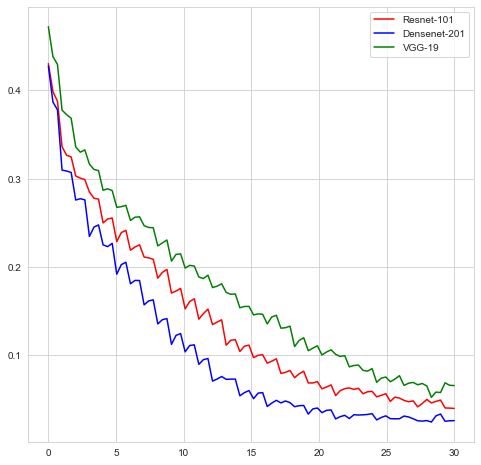

In [15]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, resnet_loss, c='red', label='Resnet-101')
plt.plot(X, densenet_loss, c='blue', label='Densenet-201')
plt.plot(X, vgg19_loss, c='green', label='VGG-19')

# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

## AUC

In [16]:
resnet_auc = []
densenet_auc = []
vgg19_auc = []

for line in renset101_output[:-2]:
#     if 'BCEloss' in line or 'a' in line or line == '':
#         continue
        
#     for ele in line.split(' '):
#         if ele == '' or ele == ' ':
#             continue
#         if ele[0] == '[':
#             resnet_auc.append(float(ele[1:]))
#         elif ele[-1] == ']' and len(ele) != 1:
#             resnet_auc.append(float(ele[:-1]))
#         else:
#             try:
#                 resnet_auc.append(float(ele))
#             except:
#                 pass
    if "mean_auc" in line:
        resnet_auc.append(float(line.split(' ')[-1]))
len(resnet_auc)

30

In [17]:
densenet_auc = []

for line in densenet201_output.split('\n')[:-3]:
#     if 'BCEloss' in line or 'a' in line or line == '':
#         continue
        
#     for ele in line.split(' '):
#         if ele == '' or ele == ' ':
#             continue
#         if ele[0] == '[' and len(ele) != 1:
#             densenet_auc.append(float(ele[1:]))
#         elif ele[-1] == ']' and len(ele) != 1:
#             densenet_auc.append(float(ele[:-1]))
#         else:
#             try:
#                 densenet_auc.append(float(ele))
#             except:
#                 pass
    if "mean_auc" in line:
        densenet_auc.append(float(line.split(' ')[-1]))

len(densenet_auc)

30

In [18]:
vgg19_auc = []
for line in vgg19_output.split('\n')[:-3]:
#     if 'BCEloss' in line or 'a' in line or line == '':
#         continue
        
#     for ele in line.split(' '):
#         if ele == '' or ele == ' ':
#             continue
#         if ele[0] == '[' and len(ele) != 1:
#             vgg19_auc.append(float(ele[1:]))
#         elif ele[-1] == ']' and len(ele) != 1:
#             vgg19_auc.append(float(ele[:-1]))
#         else:
#             try:
#                 vgg19_auc.append(float(ele))
#             except:
#                 pass
    if "mean_auc" in line:
        vgg19_auc.append(float(line.split(' ')[-1]))

len(vgg19_auc)

30

In [49]:
# plt.figure(figsize=(10,10))

# X = np.linspace(0, 30, 180, endpoint=True)

# plt.plot(X, resnet_auc, c='red', label='Resnet-101')
# plt.plot(X, densenet_auc, c='blue', label='Densenet-201')
# plt.plot(X, vgg19_auc, c='green', label='VGG-19')

# plt.ylim((0.5,1.5))
# plt.title('AUC (area under the curve) Score Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('AUC Score')

# plt.legend(loc='upper right')

# # Just want to comment on the image below:
# #  IT'S F****** USELESS... WASTED MY TIME DRAWING YOU!!!

30

In [20]:
np.mean(resnet_auc)

0.9123091999999998

In [21]:
max(- np.array(resnet_auc) + 0.9123091999999998)

0.035504199999999875

In [ ]:
"0.91 ± 0.04"

In [97]:
np.mean(densenet_auc)

0.9179499999999999

In [101]:
max(- np.array(densenet_auc) + 0.9179499999999999)

0.036168999999999896

In [ ]:
"0.92 ± 0.04"

In [103]:
np.mean(vgg19_auc)

0.9095035333333333

In [106]:
max(- np.array(vgg19_auc) + 0.9095035333333333)

0.0657945333333333

In [ ]:
"0.91 ± 0.07"

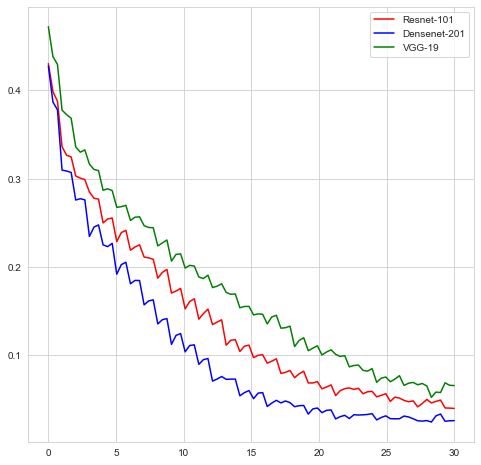

In [22]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, resnet_loss, c='red', label='Resnet-101')
plt.plot(X, densenet_loss, c='blue', label='Densenet-201')
plt.plot(X, vgg19_loss, c='green', label='VGG-19')

# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

In [23]:
l = []
for a in dn_np_out.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

dn_np_loss = []
for e in l:
    dn_np_loss.append(float( e.split(' ')[-1] ))

In [26]:
len(dn_np_loss)

90

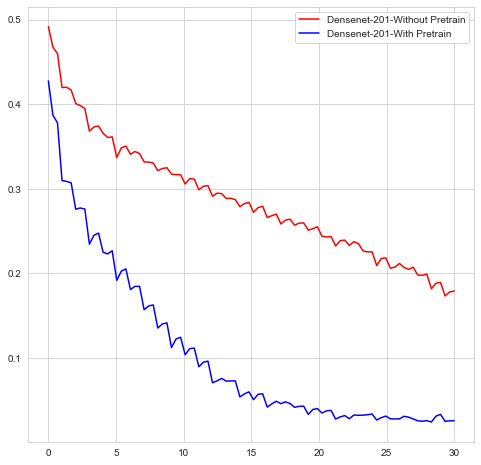

In [25]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, dn_np_loss, c='red', label='Densenet-201-Without Pretrain')
plt.plot(X, densenet_loss, c='blue', label='Densenet-201-With Pretrain')


# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

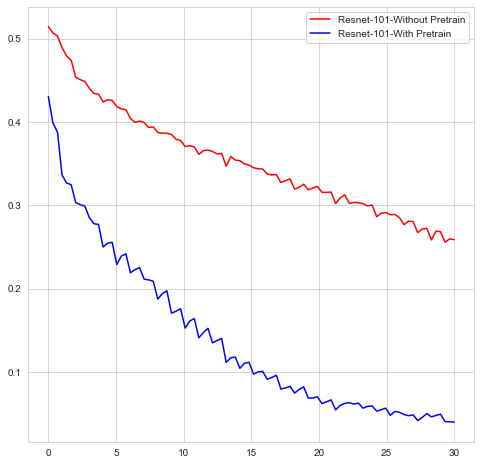

In [30]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, rn_np_loss, c='red', label='Resnet-101-Without Pretrain')
plt.plot(X, resnet_loss, c='blue', label='Resnet-101-With Pretrain')

# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

In [27]:
rn_np_out = '''Time: 0:10:04   epoch: 1 [100/252]      BCEloss: 5.143e-01
Time: 0:20:05   epoch: 1 [200/252]      BCEloss: 5.068e-01
Time: 0:25:17   epoch: 1 [252/252]      BCEloss: 5.031e-01
ACC: 0.24194756554307117 out of total:1335
[0.82121081 0.69014291 0.72072783 0.7664525  0.65017549 0.68300636]
mean_auc: 0.721953
Time: 0:36:44   epoch: 2 [100/252]      BCEloss: 4.892e-01
Time: 0:46:49   epoch: 2 [200/252]      BCEloss: 4.791e-01
Time: 0:52:02   epoch: 2 [252/252]      BCEloss: 4.741e-01
ACC: 0.16928838951310862 out of total:1335
[0.84004699 0.71308725 0.71796752 0.801641   0.66000924 0.70802976]
mean_auc: 0.740130
Time: 1:03:27   epoch: 3 [100/252]      BCEloss: 4.536e-01
Time: 1:13:27   epoch: 3 [200/252]      BCEloss: 4.507e-01
Time: 1:18:39   epoch: 3 [252/252]      BCEloss: 4.486e-01
ACC: 0.2247191011235955 out of total:1335
[0.86103167 0.73721078 0.78584    0.85398134 0.69321736 0.73448366]
mean_auc: 0.777627
Time: 1:30:04   epoch: 4 [100/252]      BCEloss: 4.402e-01
Time: 1:40:14   epoch: 4 [200/252]      BCEloss: 4.341e-01
Time: 1:45:27   epoch: 4 [252/252]      BCEloss: 4.335e-01
ACC: 0.2898876404494382 out of total:1335
[0.86109054 0.72358263 0.7926249  0.83268106 0.69262315 0.71852602]
mean_auc: 0.770188
Time: 1:56:53   epoch: 5 [100/252]      BCEloss: 4.239e-01
Time: 2:06:56   epoch: 5 [200/252]      BCEloss: 4.265e-01
Time: 2:12:09   epoch: 5 [252/252]      BCEloss: 4.259e-01
ACC: 0.27490636704119853 out of total:1335
[0.88448124 0.77764936 0.82989933 0.88110098 0.72632697 0.74695241]
mean_auc: 0.807735
Time: 2:23:40   epoch: 6 [100/252]      BCEloss: 4.185e-01
Time: 2:33:44   epoch: 6 [200/252]      BCEloss: 4.156e-01
Time: 2:38:58   epoch: 6 [252/252]      BCEloss: 4.147e-01
ACC: 0.2539325842696629 out of total:1335
[0.88590132 0.7890834  0.8413835  0.88383031 0.71060345 0.7496209 ]
mean_auc: 0.810070
Time: 2:50:25   epoch: 7 [100/252]      BCEloss: 4.043e-01
Time: 3:00:28   epoch: 7 [200/252]      BCEloss: 3.994e-01
Time: 3:05:41   epoch: 7 [252/252]      BCEloss: 4.011e-01
ACC: 0.19176029962546817 out of total:1335
[0.87863173 0.78095227 0.8348098  0.88948973 0.72839901 0.66992454]
mean_auc: 0.797035
Time: 3:17:07   epoch: 8 [100/252]      BCEloss: 3.993e-01
Time: 3:27:09   epoch: 8 [200/252]      BCEloss: 3.933e-01
Time: 3:32:22   epoch: 8 [252/252]      BCEloss: 3.941e-01
ACC: 0.29363295880149815 out of total:1335
[0.91263741 0.78112827 0.86492972 0.88918685 0.74810653 0.76806637]
mean_auc: 0.827343
Time: 3:43:50   epoch: 9 [100/252]      BCEloss: 3.873e-01
Time: 3:53:53   epoch: 9 [200/252]      BCEloss: 3.865e-01
Time: 3:59:07   epoch: 9 [252/252]      BCEloss: 3.864e-01
ACC: 0.2868913857677903 out of total:1335
[0.90892904 0.789101   0.85980804 0.90499105 0.7406681  0.79087145]
mean_auc: 0.832395
Time: 4:10:34   epoch: 10 [100/252]     BCEloss: 3.849e-01
Time: 4:20:39   epoch: 10 [200/252]     BCEloss: 3.792e-01
Time: 4:25:52   epoch: 10 [252/252]     BCEloss: 3.777e-01
ACC: 0.349063670411985 out of total:1335
[0.90438432 0.79945558 0.85798055 0.90747534 0.75489532 0.78865166]
mean_auc: 0.835474
Time: 4:37:20   epoch: 11 [100/252]     BCEloss: 3.704e-01
Time: 4:47:23   epoch: 11 [200/252]     BCEloss: 3.715e-01
Time: 4:52:36   epoch: 11 [252/252]     BCEloss: 3.700e-01
ACC: 0.39325842696629215 out of total:1335
[0.91219103 0.7730558  0.86097846 0.91258006 0.78367303 0.80464928]
mean_auc: 0.841188
Time: 5:04:01   epoch: 12 [100/252]     BCEloss: 3.611e-01
Time: 5:14:03   epoch: 12 [200/252]     BCEloss: 3.655e-01
Time: 5:19:15   epoch: 12 [252/252]     BCEloss: 3.662e-01
ACC: 0.2973782771535581 out of total:1335
[0.91721156 0.79664547 0.86925058 0.915762   0.77691195 0.78219367]
mean_auc: 0.842996
Time: 5:30:42   epoch: 13 [100/252]     BCEloss: 3.646e-01
Time: 5:40:45   epoch: 13 [200/252]     BCEloss: 3.616e-01
Time: 5:45:58   epoch: 13 [252/252]     BCEloss: 3.622e-01
ACC: 0.3775280898876405 out of total:1335
[0.92039262 0.80660112 0.87660749 0.92653975 0.79293411 0.79118539]
mean_auc: 0.852377
Time: 5:57:26   epoch: 14 [100/252]     BCEloss: 3.469e-01
Time: 6:07:30   epoch: 14 [200/252]     BCEloss: 3.584e-01
Time: 6:12:43   epoch: 14 [252/252]     BCEloss: 3.542e-01
ACC: 0.4059925093632959 out of total:1335
[0.92032394 0.819801   0.88575963 0.91690545 0.77882389 0.81032685]
mean_auc: 0.855323
Time: 6:24:09   epoch: 15 [100/252]     BCEloss: 3.535e-01
Time: 6:34:11   epoch: 15 [200/252]     BCEloss: 3.496e-01
Time: 6:39:24   epoch: 15 [252/252]     BCEloss: 3.483e-01
ACC: 0.39775280898876403 out of total:1335
[0.92489074 0.82352631 0.88619963 0.92788399 0.80536638 0.81100804]
mean_auc: 0.863146
Time: 6:50:49   epoch: 16 [100/252]     BCEloss: 3.450e-01
Time: 7:00:50   epoch: 16 [200/252]     BCEloss: 3.438e-01
Time: 7:06:02   epoch: 16 [252/252]     BCEloss: 3.435e-01
ACC: 0.3895131086142322 out of total:1335
[0.92529787 0.83704299 0.88394387 0.93686829 0.81015394 0.81511   ]
mean_auc: 0.868069
save model
Time: 7:17:28   epoch: 17 [100/252]     BCEloss: 3.374e-01
Time: 7:27:30   epoch: 17 [200/252]     BCEloss: 3.364e-01
Time: 7:32:43   epoch: 17 [252/252]     BCEloss: 3.368e-01
ACC: 0.39775280898876403 out of total:1335
[0.92428739 0.83665579 0.88573029 0.93358426 0.81985222 0.79198505]
mean_auc: 0.865349
Time: 7:44:08   epoch: 18 [100/252]     BCEloss: 3.273e-01
Time: 7:54:09   epoch: 18 [200/252]     BCEloss: 3.295e-01
Time: 7:59:23   epoch: 18 [252/252]     BCEloss: 3.317e-01
ACC: 0.4142322097378277 out of total:1335
[0.9253739  0.84217041 0.89314    0.92472247 0.82142549 0.81164481]
mean_auc: 0.869746
save model
Time: 8:10:47   epoch: 19 [100/252]     BCEloss: 3.193e-01
Time: 8:20:48   epoch: 19 [200/252]     BCEloss: 3.215e-01
Time: 8:25:59   epoch: 19 [252/252]     BCEloss: 3.253e-01
ACC: 0.3970037453183521 out of total:1335
[0.92211313 0.84729784 0.89675686 0.92609054 0.8117734  0.81508038]
mean_auc: 0.869852
save model
Time: 8:37:27   epoch: 20 [100/252]     BCEloss: 3.186e-01
Time: 8:47:30   epoch: 20 [200/252]     BCEloss: 3.206e-01
Time: 8:52:44   epoch: 20 [252/252]     BCEloss: 3.226e-01
ACC: 0.36479400749063673 out of total:1335
[0.91904612 0.85601563 0.88975782 0.93840992 0.79877463 0.81853965]
mean_auc: 0.870091
save model
Time: 9:04:10   epoch: 21 [100/252]     BCEloss: 3.155e-01
Time: 9:14:11   epoch: 21 [200/252]     BCEloss: 3.155e-01
Time: 9:19:24   epoch: 21 [252/252]     BCEloss: 3.158e-01
ACC: 0.38277153558052435 out of total:1335
[0.93329098 0.86099639 0.88811513 0.94028164 0.82291872 0.81782291]
mean_auc: 0.877238
save model
Time: 9:30:51   epoch: 22 [100/252]     BCEloss: 3.020e-01
Time: 9:41:18   epoch: 22 [200/252]     BCEloss: 3.088e-01
Time: 9:46:50   epoch: 22 [252/252]     BCEloss: 3.124e-01
ACC: 0.4254681647940075 out of total:1335
[0.92828272 0.84618905 0.89138878 0.93379866 0.82470751 0.81506557]
mean_auc: 0.873239
Time: 9:59:02   epoch: 23 [100/252]     BCEloss: 3.022e-01
Time: 10:09:42  epoch: 23 [200/252]     BCEloss: 3.034e-01
Time: 10:15:15  epoch: 23 [252/252]     BCEloss: 3.030e-01
ACC: 0.4239700374531835 out of total:1335
[0.9264923  0.83289529 0.90248281 0.94317432 0.82584975 0.82257644]
mean_auc: 0.875578
Time: 10:27:27  epoch: 24 [100/252]     BCEloss: 3.018e-01
Time: 10:38:06  epoch: 24 [200/252]     BCEloss: 2.992e-01
Time: 10:43:39  epoch: 24 [252/252]     BCEloss: 3.003e-01
ACC: 0.4337078651685393 out of total:1335
[0.93257972 0.84065096 0.89704433 0.93890337 0.83092365 0.80911848]
mean_auc: 0.874870
Time: 10:55:50  epoch: 25 [100/252]     BCEloss: 2.862e-01
Time: 11:06:31  epoch: 25 [200/252]     BCEloss: 2.905e-01
Time: 11:12:03  epoch: 25 [252/252]     BCEloss: 2.912e-01
ACC: 0.40749063670411984 out of total:1335
[0.92717168 0.8631905  0.90497618 0.93562274 0.8304064  0.82006492]
mean_auc: 0.880239
save model
Time: 11:24:16  epoch: 26 [100/252]     BCEloss: 2.886e-01
Time: 11:34:56  epoch: 26 [200/252]     BCEloss: 2.889e-01
Time: 11:40:28  epoch: 26 [252/252]     BCEloss: 2.851e-01
ACC: 0.3543071161048689 out of total:1335
[0.93519177 0.83718966 0.88362706 0.94515495 0.82928879 0.79735757]
mean_auc: 0.871302
Time: 11:52:37  epoch: 27 [100/252]     BCEloss: 2.767e-01
Time: 12:03:16  epoch: 27 [200/252]     BCEloss: 2.809e-01
Time: 12:08:49  epoch: 27 [252/252]     BCEloss: 2.804e-01
ACC: 0.4434456928838951 out of total:1335
[0.92753712 0.84568452 0.90403163 0.94659447 0.83632389 0.83092843]
mean_auc: 0.881850
save model
Time: 12:20:59  epoch: 28 [100/252]     BCEloss: 2.671e-01
Time: 12:31:38  epoch: 28 [200/252]     BCEloss: 2.715e-01
Time: 12:37:11  epoch: 28 [252/252]     BCEloss: 2.723e-01
ACC: 0.41872659176029964 out of total:1335
[0.93238351 0.8710635  0.89797714 0.95381935 0.838008   0.81159446]
mean_auc: 0.884141
save model
Time: 12:49:22  epoch: 29 [100/252]     BCEloss: 2.584e-01
Time: 13:00:03  epoch: 29 [200/252]     BCEloss: 2.688e-01
Time: 13:05:36  epoch: 29 [252/252]     BCEloss: 2.683e-01
ACC: 0.3947565543071161 out of total:1335
[0.92842865 0.8550183  0.9064194  0.93943766 0.82321736 0.81704991]
mean_auc: 0.878262
Time: 13:17:47  epoch: 30 [100/252]     BCEloss: 2.557e-01
Time: 13:28:25  epoch: 30 [200/252]     BCEloss: 2.596e-01
Time: 13:33:56  epoch: 30 [252/252]     BCEloss: 2.587e-01
ACC: 0.450936329588015 out of total:1335
[0.93533157 0.85900174 0.90465938 0.94750652 0.83651478 0.83389013]
mean_auc: 0.886151
'''

In [28]:
l = []
for a in rn_np_out.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

rn_np_loss = []
for e in l:
    rn_np_loss.append(float( e.split(' ')[-1] ))

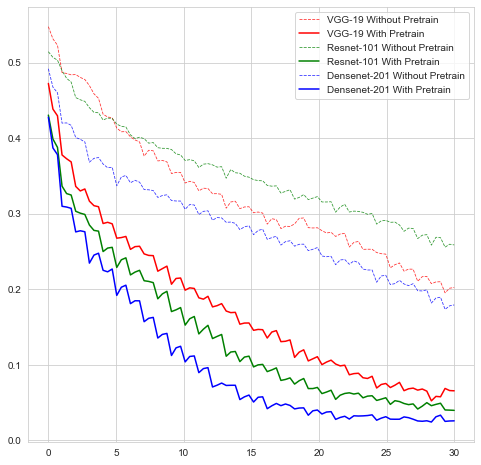

In [43]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, vgg19_loss_np, c='red', linestyle='--', label='VGG-19 Without Pretrain', alpha=0.8, linewidth=0.8)
plt.plot(X, vgg19_loss, c='red', label='VGG-19 With Pretrain')

plt.plot(X, rn_np_loss, c='green', linestyle='--', label='Resnet-101 Without Pretrain', alpha=0.8,linewidth=0.8)
plt.plot(X, resnet_loss, c='green', label='Resnet-101 With Pretrain')

plt.plot(X, dn_np_loss, c='blue', linestyle='--', label='Densenet-201 Without Pretrain', alpha=0.8, linewidth=0.8)
plt.plot(X, densenet_loss, c='blue', label='Densenet-201 With Pretrain')



# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

In [31]:
vgg_output_np = '''
Time: 0:19:52   epoch: 1 [100/252]      BCEloss: 5.474e-01
Time: 0:39:44   epoch: 1 [200/252]      BCEloss: 5.313e-01
Time: 0:50:02   epoch: 1 [252/252]      BCEloss: 5.229e-01
ACC: 0.18277153558052434 out of total:1335
[0.76363293 0.71777467 0.70258196 0.67846423 0.64769397 0.65732547]
mean_auc: 0.694579
save model
Time: 1:13:12   epoch: 2 [100/252]      BCEloss: 4.867e-01
Time: 1:33:16   epoch: 2 [200/252]      BCEloss: 4.855e-01
Time: 1:43:42   epoch: 2 [252/252]      BCEloss: 4.837e-01
ACC: 0.20674157303370785 out of total:1335
[0.84222738 0.69068851 0.72770047 0.75046793 0.66697352 0.66257508]
mean_auc: 0.723439
save model
Time: 2:06:52   epoch: 3 [100/252]      BCEloss: 4.841e-01
Time: 2:27:14   epoch: 3 [200/252]      BCEloss: 4.803e-01
Time: 2:37:54   epoch: 3 [252/252]      BCEloss: 4.775e-01
ACC: 0.15880149812734082 out of total:1335
[0.867357   0.6912693  0.73843369 0.79046167 0.68185961 0.68464714]
mean_auc: 0.742338
save model
Time: 3:01:23   epoch: 4 [100/252]      BCEloss: 4.695e-01
Time: 3:21:49   epoch: 4 [200/252]      BCEloss: 4.586e-01
Time: 3:32:25   epoch: 4 [252/252]      BCEloss: 4.526e-01
ACC: 0.26666666666666666 out of total:1335
[0.8957805  0.71575069 0.79193556 0.87149731 0.70924877 0.68002689]
mean_auc: 0.777373
save model
Time: 3:55:53   epoch: 5 [100/252]      BCEloss: 4.316e-01
Time: 4:16:16   epoch: 5 [200/252]      BCEloss: 4.279e-01
Time: 4:26:48   epoch: 5 [252/252]      BCEloss: 4.269e-01
ACC: 0.29363295880149815 out of total:1335
[0.90714843 0.73463533 0.82219921 0.91104184 0.74165333 0.70945137]
mean_auc: 0.804355
save model
Time: 4:50:16   epoch: 6 [100/252]      BCEloss: 4.133e-01
Time: 5:10:39   epoch: 6 [200/252]      BCEloss: 4.084e-01
Time: 5:21:13   epoch: 6 [252/252]      BCEloss: 4.086e-01
ACC: 0.2883895131086142 out of total:1335
[0.90754085 0.74031422 0.84243071 0.91670467 0.74822352 0.71720214]
mean_auc: 0.812069
save model
Time: 5:44:37   epoch: 7 [100/252]      BCEloss: 4.017e-01
Time: 6:04:58   epoch: 7 [200/252]      BCEloss: 3.976e-01
Time: 6:15:34   epoch: 7 [252/252]      BCEloss: 3.949e-01
ACC: 0.3333333333333333 out of total:1335
[0.91660821 0.76613906 0.86251555 0.92695153 0.76771244 0.73904764]
mean_auc: 0.829829
save model
Time: 6:38:58   epoch: 8 [100/252]      BCEloss: 3.762e-01
Time: 6:59:18   epoch: 8 [200/252]      BCEloss: 3.839e-01
Time: 7:09:53   epoch: 8 [252/252]      BCEloss: 3.832e-01
ACC: 0.3393258426966292 out of total:1335
[0.92833422 0.80149129 0.86822683 0.93272667 0.78623461 0.7560241 ]
mean_auc: 0.845506
save model
Time: 7:33:20   epoch: 9 [100/252]      BCEloss: 3.698e-01
Time: 7:53:40   epoch: 9 [200/252]      BCEloss: 3.705e-01
Time: 8:04:17   epoch: 9 [252/252]      BCEloss: 3.685e-01
ACC: 0.3872659176029963 out of total:1335
[0.93226579 0.80849017 0.87063807 0.93055546 0.79784483 0.7792142 ]
Time: 0:20:02   epoch: 10 [100/252]     BCEloss: 3.531e-01
Time: 0:39:59   epoch: 10 [200/252]     BCEloss: 3.546e-01
Time: 0:50:23   epoch: 10 [252/252]     BCEloss: 3.546e-01
ACC: 0.40074906367041196 out of total:1335
[0.93472822 0.82339724 0.88349799 0.93433976 0.80909175 0.78372191]
mean_auc: 0.861463
Time: 1:12:51   epoch: 11 [100/252]     BCEloss: 3.406e-01
Time: 1:32:47   epoch: 11 [200/252]     BCEloss: 3.428e-01
Time: 1:43:08   epoch: 11 [252/252]     BCEloss: 3.413e-01
ACC: 0.38277153558052435 out of total:1335
[0.93487538 0.79375323 0.88343053 0.93125311 0.81805111 0.79554797]
mean_auc: 0.859485
Time: 2:05:57   epoch: 12 [100/252]     BCEloss: 3.302e-01
Time: 2:25:55   epoch: 12 [200/252]     BCEloss: 3.337e-01
Time: 2:36:18   epoch: 12 [252/252]     BCEloss: 3.333e-01
ACC: 0.3887640449438202 out of total:1335
[0.93546892 0.82794387 0.89239199 0.94038714 0.82008621 0.80136771]
mean_auc: 0.869608
Time: 2:59:11   epoch: 13 [100/252]     BCEloss: 3.264e-01
Time: 3:19:10   epoch: 13 [200/252]     BCEloss: 3.265e-01
Time: 3:29:34   epoch: 13 [252/252]     BCEloss: 3.256e-01
ACC: 0.41647940074906364 out of total:1335
[0.93554495 0.85207913 0.89312534 0.93964526 0.82679187 0.80921622]
mean_auc: 0.876067
Time: 3:52:30   epoch: 14 [100/252]     BCEloss: 3.073e-01
Time: 4:12:33   epoch: 14 [200/252]     BCEloss: 3.155e-01
Time: 4:22:58   epoch: 14 [252/252]     BCEloss: 3.165e-01
ACC: 0.41722846441947564 out of total:1335
[0.92604592 0.83531234 0.88650177 0.94444029 0.81971983 0.80013268]
mean_auc: 0.868692
Time: 4:45:53   epoch: 15 [100/252]     BCEloss: 3.067e-01
Time: 5:05:55   epoch: 15 [200/252]     BCEloss: 3.089e-01
Time: 5:16:21   epoch: 15 [252/252]     BCEloss: 3.092e-01
ACC: 0.4157303370786517 out of total:1335
[0.93490481 0.84553785 0.89619072 0.93900206 0.82402401 0.81787919]
mean_auc: 0.876256
Time: 5:39:20   epoch: 16 [100/252]     BCEloss: 3.012e-01
Time: 5:59:22   epoch: 16 [200/252]     BCEloss: 3.022e-01
Time: 6:09:48   epoch: 16 [252/252]     BCEloss: 3.008e-01
ACC: 0.4419475655430712 out of total:1335
[0.93785042 0.85998146 0.90406977 0.94260599 0.84014778 0.80859426]
mean_auc: 0.882208
Time: 6:32:45   epoch: 17 [100/252]     BCEloss: 2.862e-01
Time: 6:52:58   epoch: 17 [200/252]     BCEloss: 2.934e-01
Time: 7:03:25   epoch: 17 [252/252]     BCEloss: 2.921e-01
ACC: 0.4322097378277154 out of total:1335
[0.93821831 0.84888182 0.90416657 0.94442327 0.83402094 0.80783903]
mean_auc: 0.879592
Time: 7:26:25   epoch: 18 [100/252]     BCEloss: 2.803e-01
Time: 7:46:31   epoch: 18 [200/252]     BCEloss: 2.834e-01
Time: 7:56:59   epoch: 18 [252/252]     BCEloss: 2.831e-01
ACC: 0.4659176029962547 out of total:1335
[0.93646959 0.84542639 0.90584446 0.94433479 0.84091441 0.82326059]
mean_auc: 0.882708
Time: 8:20:01   epoch: 19 [100/252]     BCEloss: 2.865e-01
Time: 8:40:07   epoch: 19 [200/252]     BCEloss: 2.939e-01
Time: 8:50:34   epoch: 19 [252/252]     BCEloss: 2.943e-01
ACC: 0.4599250936329588 out of total:1335
[0.94158577 0.86610621 0.91054666 0.94765285 0.84255542 0.81433996]
mean_auc: 0.887131
Time: 9:13:34   epoch: 20 [100/252]     BCEloss: 2.815e-01
Time: 9:33:40   epoch: 20 [200/252]     BCEloss: 2.811e-01
Time: 9:44:08   epoch: 20 [252/252]     BCEloss: 2.814e-01
ACC: 0.43670411985018726 out of total:1335
[0.93126266 0.84704557 0.90064652 0.94167693 0.80579126 0.81998199]
mean_auc: 0.874401
Time: 10:07:07  epoch: 21 [100/252]     BCEloss: 2.775e-01
Time: 10:27:15  epoch: 21 [200/252]     BCEloss: 2.745e-01
Time: 10:37:43  epoch: 21 [252/252]     BCEloss: 2.754e-01
ACC: 0.46741573033707867 out of total:1335
[0.93938944 0.85578683 0.90923251 0.94541699 0.84416256 0.82137103]
mean_auc: 0.885893
Time: 11:00:44  epoch: 22 [100/252]     BCEloss: 2.699e-01
Time: 11:20:50  epoch: 22 [200/252]     BCEloss: 2.731e-01
Time: 11:31:18  epoch: 22 [252/252]     BCEloss: 2.740e-01
ACC: 0.45318352059925093 out of total:1335
[0.94158577 0.86594194 0.90511698 0.94841175 0.8476016  0.82386774]
mean_auc: 0.888754
save model
Time: 11:54:19  epoch: 23 [100/252]     BCEloss: 2.559e-01
Time: 12:14:24  epoch: 23 [200/252]     BCEloss: 2.620e-01
Time: 12:24:51  epoch: 23 [252/252]     BCEloss: 2.633e-01
ACC: 0.4599250936329588 out of total:1335
[0.93179488 0.8442472  0.90344202 0.95033453 0.83892549 0.81136345]
mean_auc: 0.880018
Time: 12:47:50  epoch: 24 [100/252]     BCEloss: 2.528e-01
Time: 13:07:56  epoch: 24 [200/252]     BCEloss: 2.530e-01
Time: 13:18:24  epoch: 24 [252/252]     BCEloss: 2.529e-01
ACC: 0.49213483146067416 out of total:1335
[0.94073716 0.86099052 0.91233896 0.95302642 0.84341133 0.82905072]
mean_auc: 0.889926
save model
Time: 13:41:21  epoch: 25 [100/252]     BCEloss: 2.486e-01
Time: 14:01:27  epoch: 25 [200/252]     BCEloss: 2.471e-01
Time: 14:11:54  epoch: 25 [252/252]     BCEloss: 2.465e-01
ACC: 0.4764044943820225 out of total:1335
[0.94409971 0.85651429 0.90971359 0.94901411 0.85839286 0.83693476]
mean_auc: 0.892445
save model
Time: 14:34:51  epoch: 26 [100/252]     BCEloss: 2.284e-01
Time: 14:54:55  epoch: 26 [200/252]     BCEloss: 2.325e-01
Time: 15:05:21  epoch: 26 [252/252]     BCEloss: 2.348e-01
ACC: 0.4891385767790262 out of total:1335
[0.93982724 0.86208758 0.91037653 0.94768348 0.85251847 0.83105579]
mean_auc: 0.890592
Time: 15:28:17  epoch: 27 [100/252]     BCEloss: 2.240e-01
Time: 15:48:21  epoch: 27 [200/252]     BCEloss: 2.267e-01
Time: 15:58:48  epoch: 27 [252/252]     BCEloss: 2.265e-01
ACC: 0.4786516853932584 out of total:1335
[0.93465465 0.86805393 0.90585326 0.94632563 0.85907328 0.81462132]
mean_auc: 0.888097
Time: 16:21:45  epoch: 28 [100/252]     BCEloss: 2.106e-01
Time: 16:41:49  epoch: 28 [200/252]     BCEloss: 2.167e-01
Time: 16:52:15  epoch: 28 [252/252]     BCEloss: 2.170e-01
ACC: 0.501123595505618 out of total:1335
[0.94152691 0.85376871 0.89769261 0.94239159 0.85959052 0.82904775]
mean_auc: 0.887336
Time: 17:15:13  epoch: 29 [100/252]     BCEloss: 2.074e-01
Time: 17:35:16  epoch: 29 [200/252]     BCEloss: 2.097e-01
Time: 17:45:42  epoch: 29 [252/252]     BCEloss: 2.100e-01
ACC: 0.501123595505618 out of total:1335
[0.93939067 0.851117   0.91216589 0.94442327 0.84984914 0.82491618]
mean_auc: 0.886977
Time: 18:08:40  epoch: 30 [100/252]     BCEloss: 1.953e-01
Time: 18:28:46  epoch: 30 [200/252]     BCEloss: 2.014e-01
Time: 18:39:12  epoch: 30 [252/252]     BCEloss: 2.023e-01
ACC: 0.5123595505617977 out of total:1335
[0.94004307 0.85163913 0.9108136  0.94465128 0.85688424 0.83104098]
mean_auc: 0.889179
ACC: 0.4764044943820225 out of total:1335
[0.94409971 0.85651429 0.90971359 0.94901411 0.85839286 0.83693476]
mean_auc: 0.892445'''

In [32]:
l = []
for a in vgg_output_np.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

vgg19_loss_np = []
for e in l:
    vgg19_loss_np.append(float(e.split(' ')[-1]))

In [1]:
densenet_nw_out = '''
Time: 0:12:04	epoch: 1 [100/252]	BCEloss: 4.317e-01
Time: 0:23:28	epoch: 1 [200/252]	BCEloss: 3.894e-01
Time: 0:29:25	epoch: 1 [252/252]	BCEloss: 3.800e-01
Time: 0:40:41	epoch: 2 [100/252]	BCEloss: 3.057e-01
Time: 0:52:01	epoch: 2 [200/252]	BCEloss: 3.055e-01
Time: 0:57:48	epoch: 2 [252/252]	BCEloss: 3.040e-01
Time: 1:09:12	epoch: 3 [100/252]	BCEloss: 2.705e-01
Time: 1:20:18	epoch: 3 [200/252]	BCEloss: 2.708e-01
Time: 1:26:17	epoch: 3 [252/252]	BCEloss: 2.701e-01
Time: 1:37:59	epoch: 4 [100/252]	BCEloss: 2.473e-01
Time: 1:49:25	epoch: 4 [200/252]	BCEloss: 2.488e-01
Time: 1:55:16	epoch: 4 [252/252]	BCEloss: 2.504e-01
Time: 2:06:53	epoch: 5 [100/252]	BCEloss: 2.204e-01
Time: 2:18:12	epoch: 5 [200/252]	BCEloss: 2.269e-01
Time: 2:24:05	epoch: 5 [252/252]	BCEloss: 2.288e-01
Time: 2:35:23	epoch: 6 [100/252]	BCEloss: 1.966e-01
Time: 2:46:58	epoch: 6 [200/252]	BCEloss: 2.014e-01
Time: 2:52:58	epoch: 6 [252/252]	BCEloss: 2.027e-01
Time: 3:04:38	epoch: 7 [100/252]	BCEloss: 1.778e-01
Time: 3:16:15	epoch: 7 [200/252]	BCEloss: 1.789e-01
Time: 3:22:20	epoch: 7 [252/252]	BCEloss: 1.815e-01
Time: 3:33:56	epoch: 8 [100/252]	BCEloss: 1.531e-01
Time: 3:45:39	epoch: 8 [200/252]	BCEloss: 1.566e-01
Time: 3:51:45	epoch: 8 [252/252]	BCEloss: 1.584e-01
Time: 4:03:35	epoch: 9 [100/252]	BCEloss: 1.379e-01
Time: 4:15:19	epoch: 9 [200/252]	BCEloss: 1.409e-01
Time: 4:21:27	epoch: 9 [252/252]	BCEloss: 1.436e-01
Time: 4:33:17	epoch: 10 [100/252]	BCEloss: 1.284e-01
Time: 4:44:56	epoch: 10 [200/252]	BCEloss: 1.274e-01
Time: 4:50:56	epoch: 10 [252/252]	BCEloss: 1.278e-01
Time: 5:02:34	epoch: 11 [100/252]	BCEloss: 1.016e-01
Time: 5:14:14	epoch: 11 [200/252]	BCEloss: 1.051e-01
Time: 5:20:18	epoch: 11 [252/252]	BCEloss: 1.079e-01
Time: 5:31:53	epoch: 12 [100/252]	BCEloss: 9.003e-02
Time: 5:43:42	epoch: 12 [200/252]	BCEloss: 9.312e-02
Time: 5:49:51	epoch: 12 [252/252]	BCEloss: 9.542e-02
Time: 6:01:36	epoch: 13 [100/252]	BCEloss: 7.650e-02
Time: 6:13:19	epoch: 13 [200/252]	BCEloss: 8.227e-02
Time: 6:19:25	epoch: 13 [252/252]	BCEloss: 8.315e-02
Time: 6:31:14	epoch: 14 [100/252]	BCEloss: 6.547e-02
Time: 6:43:06	epoch: 14 [200/252]	BCEloss: 6.918e-02
Time: 6:49:21	epoch: 14 [252/252]	BCEloss: 6.790e-02
Time: 7:01:11	epoch: 15 [100/252]	BCEloss: 5.281e-02
Time: 7:12:58	epoch: 15 [200/252]	BCEloss: 5.975e-02
Time: 7:19:04	epoch: 15 [252/252]	BCEloss: 6.180e-02
Time: 7:30:34	epoch: 16 [100/252]	BCEloss: 5.549e-02
Time: 7:42:02	epoch: 16 [200/252]	BCEloss: 5.645e-02
Time: 7:48:00	epoch: 16 [252/252]	BCEloss: 5.537e-02
[0.95692082 0.93707467 0.92816453 0.95490495 0.87211823 0.88299511]
mean_auc: 0.922030
save model
Time: 8:01:04	epoch: 17 [100/252]	BCEloss: 4.441e-02
Time: 8:12:42	epoch: 17 [200/252]	BCEloss: 4.771e-02
Time: 8:18:48	epoch: 17 [252/252]	BCEloss: 4.724e-02
[0.96079965 0.92913714 0.9349641  0.96325967 0.88569581 0.88189039]
mean_auc: 0.925958
save model
Time: 8:31:37	epoch: 18 [100/252]	BCEloss: 4.699e-02
Time: 8:42:43	epoch: 18 [200/252]	BCEloss: 4.582e-02
Time: 8:48:39	epoch: 18 [252/252]	BCEloss: 4.843e-02
[0.95981125 0.91511006 0.92401967 0.96536281 0.88978756 0.88905771]
mean_auc: 0.923858
Time: 9:01:54	epoch: 19 [100/252]	BCEloss: 4.661e-02
Time: 9:13:44	epoch: 19 [200/252]	BCEloss: 4.410e-02
Time: 9:19:50	epoch: 19 [252/252]	BCEloss: 4.406e-02
[0.96143611 0.93422349 0.9283376  0.96232721 0.89294643 0.86690123]
mean_auc: 0.924362
Time: 9:33:03	epoch: 20 [100/252]	BCEloss: 3.261e-02
Time: 9:44:47	epoch: 20 [200/252]	BCEloss: 3.505e-02
Time: 9:50:51	epoch: 20 [252/252]	BCEloss: 3.456e-02
[0.95623409 0.93231684 0.93154671 0.96288872 0.85735837 0.87520288]
mean_auc: 0.919258
Time: 10:03:56	epoch: 21 [100/252]	BCEloss: 3.242e-02
Time: 10:15:40	epoch: 21 [200/252]	BCEloss: 3.211e-02
Time: 10:21:52	epoch: 21 [252/252]	BCEloss: 3.467e-02
[0.95579384 0.92572277 0.9306667  0.9586416  0.87085899 0.87430104]
mean_auc: 0.919331
Time: 10:35:13	epoch: 22 [100/252]	BCEloss: 4.082e-02
Time: 10:46:55	epoch: 22 [200/252]	BCEloss: 3.897e-02
Time: 10:53:09	epoch: 22 [252/252]	BCEloss: 3.783e-02
[0.9596322  0.92169827 0.93233872 0.95657249 0.88992303 0.87072775]
mean_auc: 0.921815
Time: 11:06:17	epoch: 23 [100/252]	BCEloss: 3.002e-02
Time: 11:18:11	epoch: 23 [200/252]	BCEloss: 3.274e-02
Time: 11:24:20	epoch: 23 [252/252]	BCEloss: 3.549e-02
[0.95401569 0.93180645 0.93595998 0.95952812 0.88447044 0.8607409 ]
mean_auc: 0.921087
Time: 11:37:19	epoch: 24 [100/252]	BCEloss: 3.099e-02
Time: 11:48:48	epoch: 24 [200/252]	BCEloss: 3.003e-02
Time: 11:54:59	epoch: 24 [252/252]	BCEloss: 3.133e-02
[0.95914168 0.93242831 0.9331982  0.95345521 0.87897475 0.86980074]
mean_auc: 0.921166
Time: 12:08:10	epoch: 25 [100/252]	BCEloss: 2.976e-02
Time: 12:19:48	epoch: 25 [200/252]	BCEloss: 2.835e-02
Time: 12:25:44	epoch: 25 [252/252]	BCEloss: 2.826e-02
[0.96178316 0.94064157 0.92744292 0.95640233 0.88727217 0.88215102]
mean_auc: 0.925949
Time: 12:38:54	epoch: 26 [100/252]	BCEloss: 2.616e-02
Time: 12:50:28	epoch: 26 [200/252]	BCEloss: 3.061e-02
Time: 12:56:25	epoch: 26 [252/252]	BCEloss: 3.227e-02
[0.95245336 0.92562303 0.93647185 0.95601608 0.88653633 0.87525915]
mean_auc: 0.922060
Time: 13:08:58	epoch: 27 [100/252]	BCEloss: 3.171e-02
Time: 13:20:20	epoch: 27 [200/252]	BCEloss: 3.598e-02
Time: 13:26:15	epoch: 27 [252/252]	BCEloss: 3.584e-02
[0.95851871 0.93449336 0.94136766 0.96376333 0.88365148 0.87258177]
mean_auc: 0.925729
Time: 13:39:09	epoch: 28 [100/252]	BCEloss: 1.691e-02
Time: 13:50:39	epoch: 28 [200/252]	BCEloss: 1.824e-02
Time: 13:56:33	epoch: 28 [252/252]	BCEloss: 1.972e-02
[0.95381212 0.91587858 0.93394035 0.959295   0.88798337 0.88607824]
mean_auc: 0.922831
Time: 14:09:25	epoch: 29 [100/252]	BCEloss: 2.254e-02
Time: 14:20:44	epoch: 29 [200/252]	BCEloss: 2.533e-02
Time: 14:26:38	epoch: 29 [252/252]	BCEloss: 2.695e-02
[0.95337555 0.91472286 0.93696759 0.95301791 0.87086207 0.87104761]
mean_auc: 0.916666
Time: 14:39:32	epoch: 30 [100/252]	BCEloss: 2.402e-02
Time: 14:50:50	epoch: 30 [200/252]	BCEloss: 2.467e-02
Time: 14:56:43	epoch: 30 [252/252]	BCEloss: 2.763e-02
[0.95738314 0.90368189 0.92774505 0.96197668 0.87841441 0.85641682]
mean_auc: 0.914270
[0.96079965 0.92913714 0.9349641  0.96325967 0.88569581 0.88189039]
mean_auc: 0.925958
'''

In [2]:
l = []
for a in densenet_nw_out.split('\n'):
    if 'BCEloss' in a:
        l.append(a)

densenet_nw_loss = []
for e in l:
    densenet_nw_loss.append(float(e.split(' ')[-1]))

In [4]:
len(densenet_nw_loss)

90

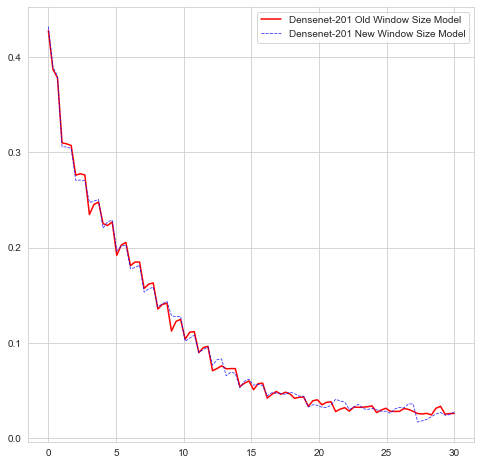

In [13]:
plt.figure(figsize=(8,8))

X = np.linspace(0, 30, 90, endpoint=True)

plt.plot(X, densenet_loss, c='red', label='Densenet-201 Old Window Size Model')
plt.plot(X, densenet_nw_loss, c='blue', linestyle='--', label='Densenet-201 New Window Size Model', alpha=0.8, linewidth=0.8)



# plt.title('Loss Comparison of Different Pretrained Models')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.legend(loc='upper right')

In [2]:
import numpy as np

In [7]:
a = np.array([0.96079965,0.92913714,0.9349641,0.96325967,0.88569581,0.88189039])
a.mean()
# a.max()-a.mean()

0.9259577933333333